<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/EDA_Guilherme_TCC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependências

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install seaborn
# !pip install matplotlib

In [3]:
import pandas as pd
# import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime, date

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Leitura e descrição do dataset

In [6]:
file_name = '/content/drive/MyDrive/dataset_tcc2.csv'
dataset = pd.read_csv(file_name)

In [ ]:
dataset.head()

,day,month,year,hour,week_day,quantity,holiday,time_elapsed,ongoing_orders,average_delivery_time,reseller,waze_avg_time,waze_avg_distance
0,3,3,2023,17:49,friday,1,False,64.123500,2,40.578217,617bffde26c21e0004ba123f,9.033333,3.470
1,3,3,2023,17:07,friday,1,False,45.047067,4,40.560233,617bffde26c21e0004ba123f,11.266667,4.414
2,3,3,2023,17:01,friday,1,False,48.551800,3,40.556667,617bffde26c21e0004ba123f,9.483333,4.122
3,3,3,2023,16:42,friday,1,False,45.278300,5,40.554567,617bffde26c21e0004ba123f,14.300000,5.939
4,3,3,2023,16:25,friday,1,False,53.148500,3,40.550617,617bffde26c21e0004ba123f,11.016667,3.971


In [7]:
dataset.shape

(11652, 13)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   day                    11652 non-null  int64  
 1   month                  11652 non-null  int64  
 2   year                   11652 non-null  int64  
 3   hour                   11652 non-null  object 
 4   week_day               11652 non-null  object 
 5   quantity               11652 non-null  int64  
 6   holiday                11652 non-null  bool   
 7   time_elapsed           11652 non-null  float64
 8   ongoing_orders         11652 non-null  int64  
 9   average_delivery_time  11652 non-null  float64
 10  reseller               11652 non-null  object 
 11  waze_avg_time          11652 non-null  float64
 12  waze_avg_distance      11652 non-null  float64
dtypes: bool(1), float64(4), int64(5), object(3)
memory usage: 1.1+ MB


In [9]:
dataset.describe(include='all')

,day,month,year,hour,week_day,quantity,holiday,time_elapsed,ongoing_orders,average_delivery_time,reseller,waze_avg_time,waze_avg_distance
count,11652.000000,11652.000000,11652.000000,11652,11652,11652.000000,11652,11652.000000,11652.000000,11652.000000,11652,11652.000000,11652.000000
unique,NaN,NaN,NaN,854,7,NaN,2,NaN,NaN,NaN,6,NaN,NaN
top,NaN,NaN,NaN,12:29,monday,NaN,False,NaN,NaN,NaN,617bffde26c21e0004ba123f,NaN,NaN
freq,NaN,NaN,NaN,35,1757,NaN,11171,NaN,NaN,NaN,3897,NaN,NaN
mean,15.387573,7.116976,2022.404222,NaN,NaN,1.042396,NaN,39.787782,1.170700,39.705858,NaN,10.078918,5.299301
std,8.572780,4.650903,0.490762,NaN,NaN,0.217873,NaN,25.658617,1.393163,10.451176,NaN,5.170082,3.731655
min,1.000000,1.000000,2022.000000,NaN,NaN,1.000000,NaN,0.182500,0.000000,0.000000,NaN,0.033333,0.007000
25%,8.000000,2.000000,2022.000000,NaN,NaN,1.000000,NaN,22.472537,0.000000,32.266004,NaN,6.200000,2.901750
50%,15.000000,10.000000,2022.000000,NaN,NaN,1.000000,NaN,33.133617,1.000000,36.891600,NaN,9.250000,4.278000
75%,22.000000,11.000000,2023.000000,NaN,NaN,1.000000,NaN,49.416842,2.000000,42.518358,NaN,13.033333,6.423000


# Constantes e variáveis globais

In [13]:
weekdays = dict(
    sunday = 0, 
    monday = 1, 
    tuesday = 2, 
    wednesday = 3, 
    thursday = 4, 
    friday = 5,
    saturday = 6
)

In [14]:
def initials(string):
    return string[:3]

resellers = dataset.reseller.unique().tolist()
wdays = list(map(initials, list(weekdays.keys())))

In [15]:
quantities = dataset.quantity.unique().tolist()
quantities.sort()

ongoing_orders_quantities = dataset.ongoing_orders.unique().tolist()
ongoing_orders_quantities.sort()

# Classes e funções auxiliares

In [16]:
class GraficoBarra:
    def __init__(self, columns, values, title, fontsize = 14, figsize = (12, 4), alpha = 0.5, xlabel = '', ylabel = '', opts = dict()):
        self.columns = columns
        self.values = values
        self.title = title
        self.fontsize = fontsize
        self.figsize = figsize
        self.alpha = alpha
        self.xlabel = xlabel
        self.ylabel = ylabel
        self.opts = opts
        
class GraficoHistograma:
    def __init__(self, values, title, bins = 20, fontsize = 14, figsize = (12, 4), alpha = 0.5, xlabel = '', ylabel = '', opts = dict()):
        self.values = values
        self.title = title
        self.bins = bins
        self.fontsize = fontsize
        self.figsize = figsize
        self.alpha = alpha
        self.xlabel = xlabel
        self.ylabel = ylabel
        self.opts = opts

# Análise Exploratória

In [17]:
!pip install sweetviz
import sweetviz 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 58.9 MB/s eta 0:00:00


In [20]:
my_report = sweetviz.analyze(dataset)

                                             |          | [  0%]   00:00 -> (? left)

In [21]:
my_report.show_html('Report.html')

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



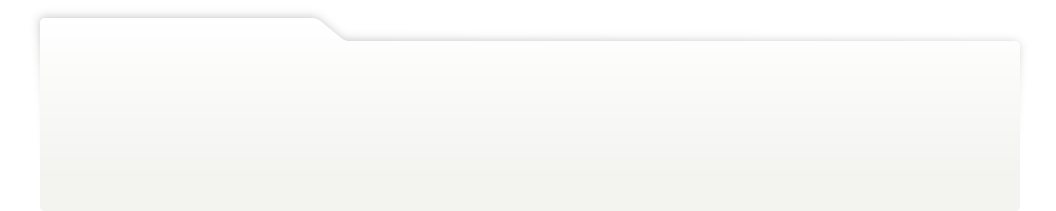
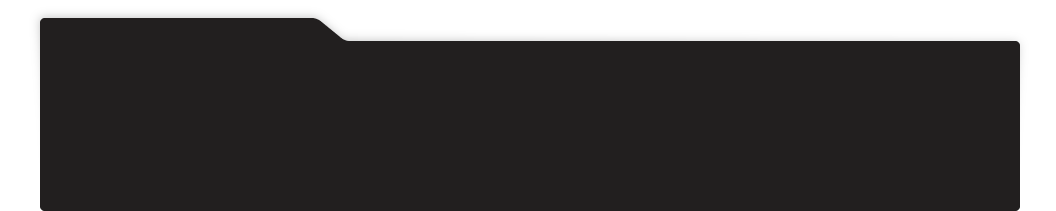
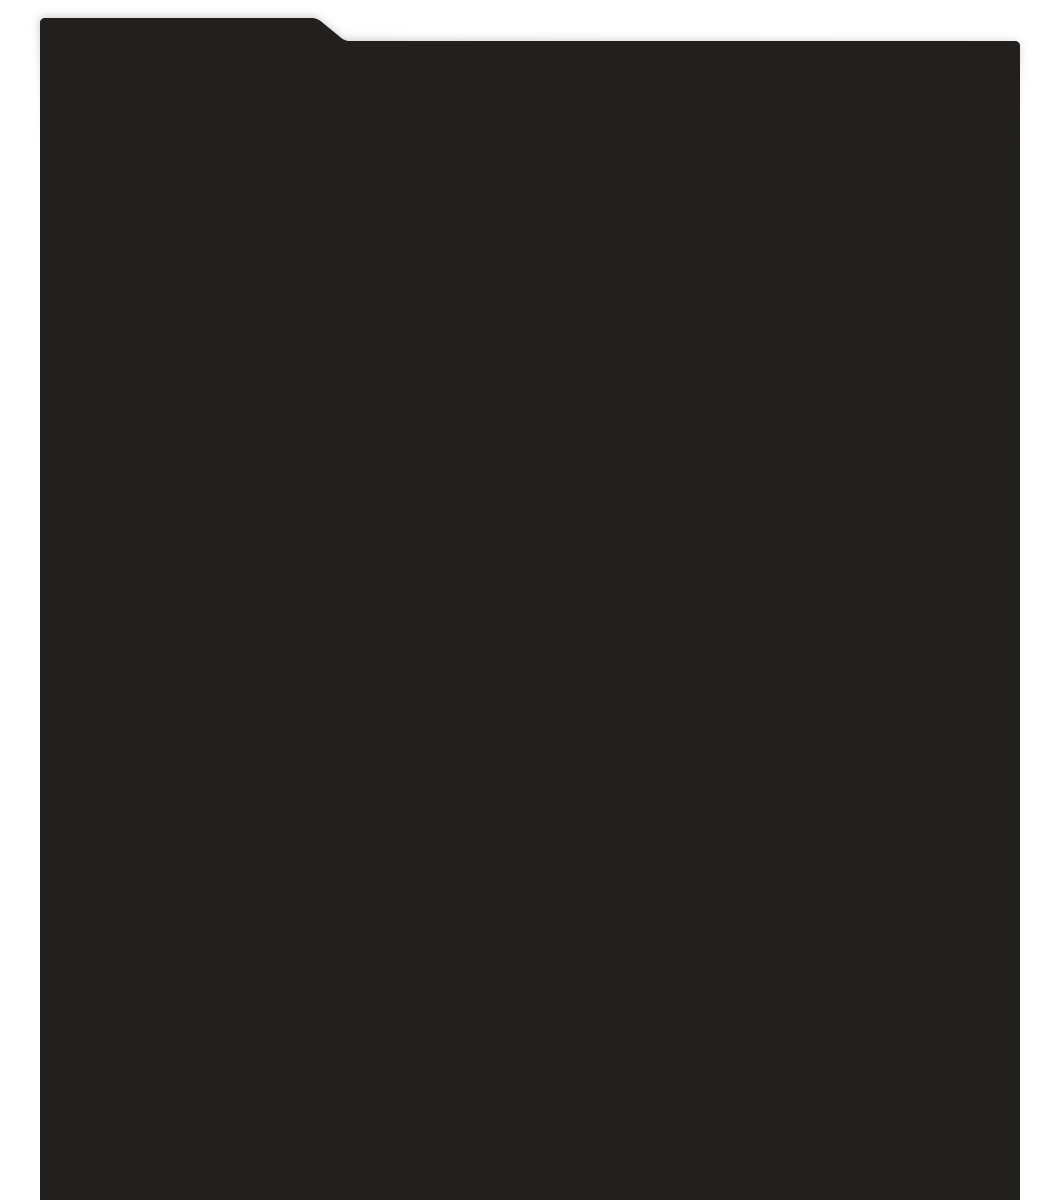
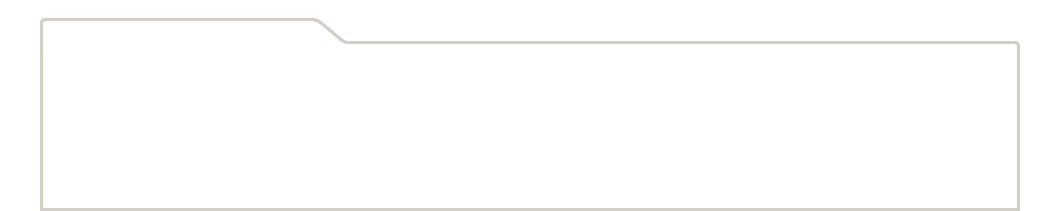
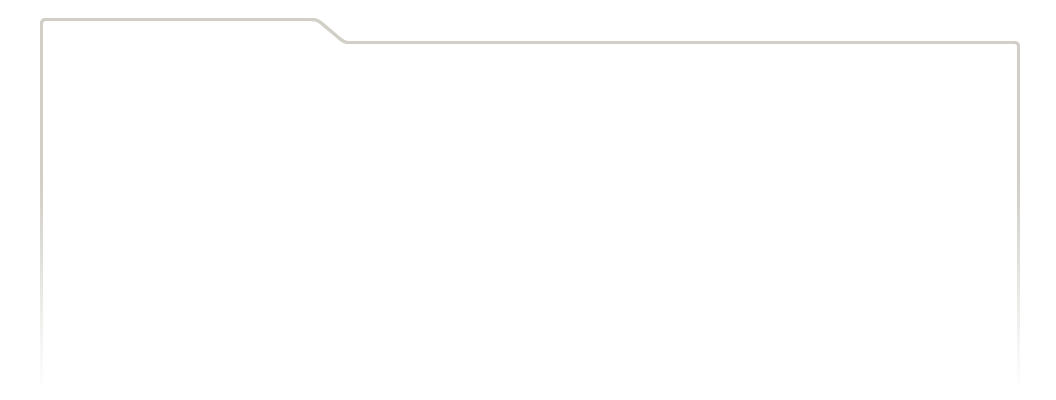
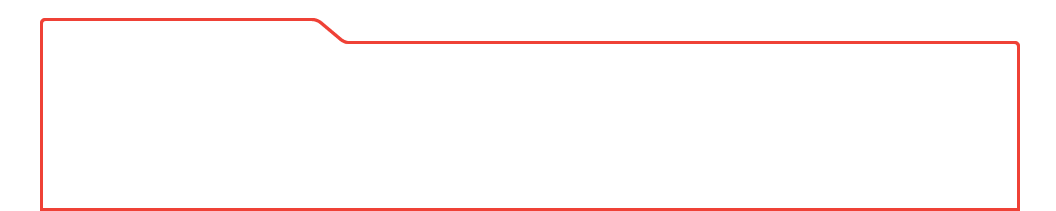
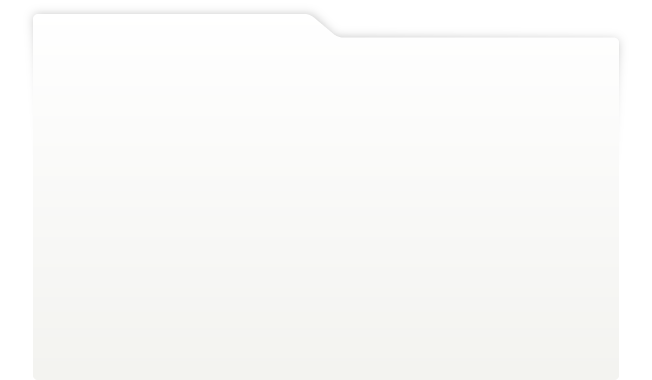
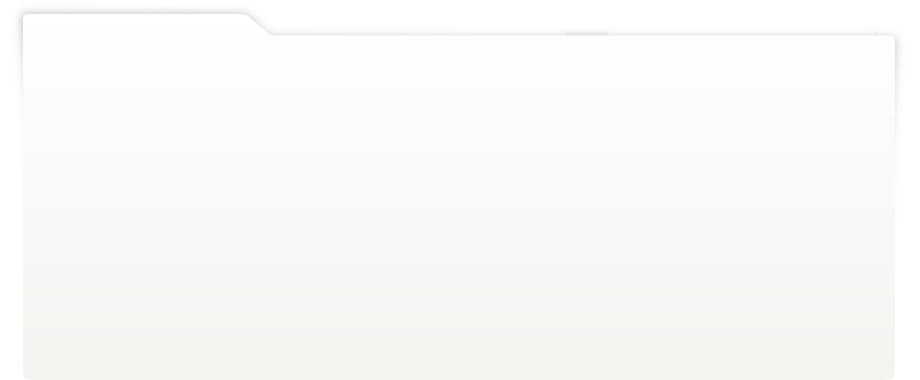
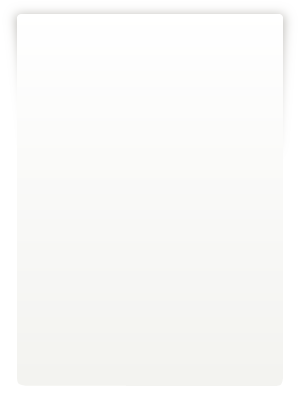
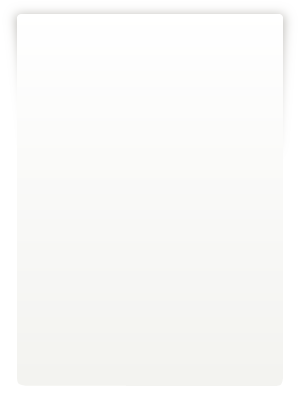
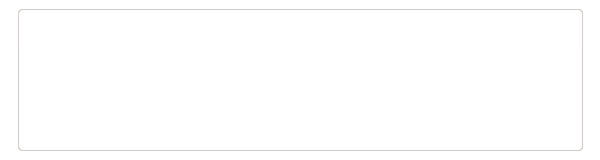
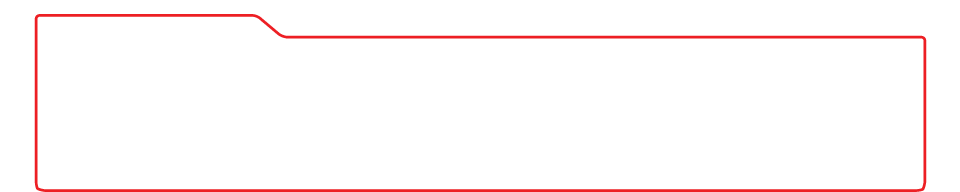
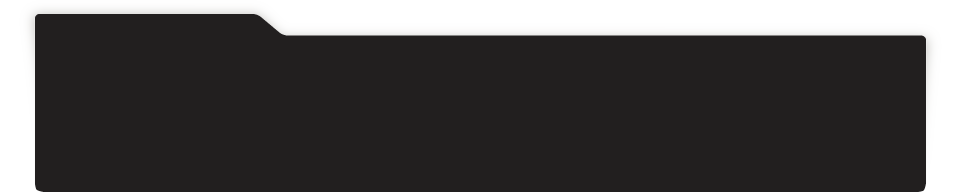
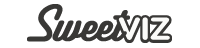
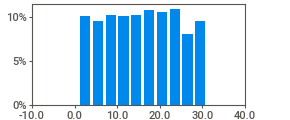
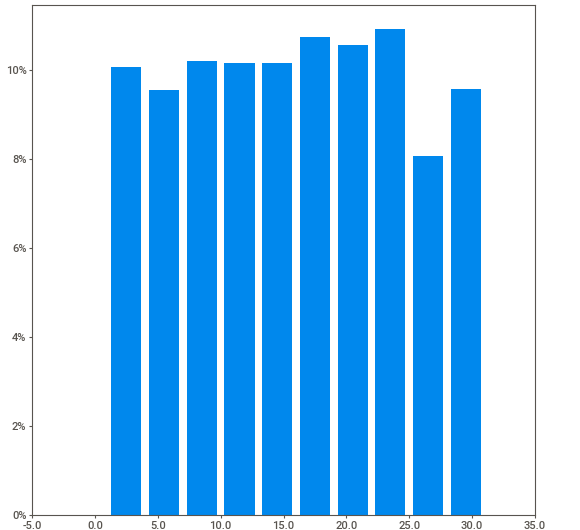
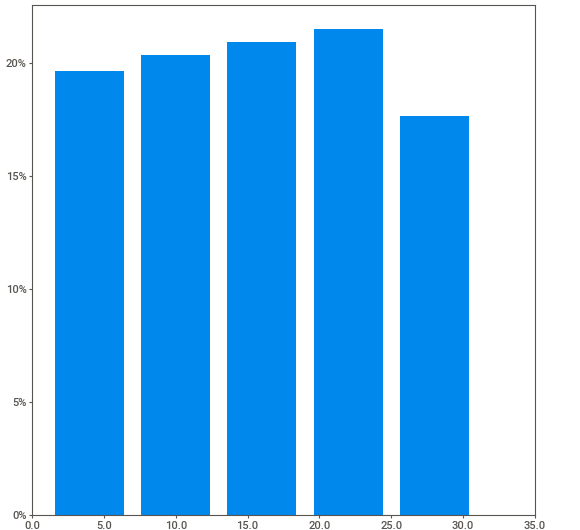
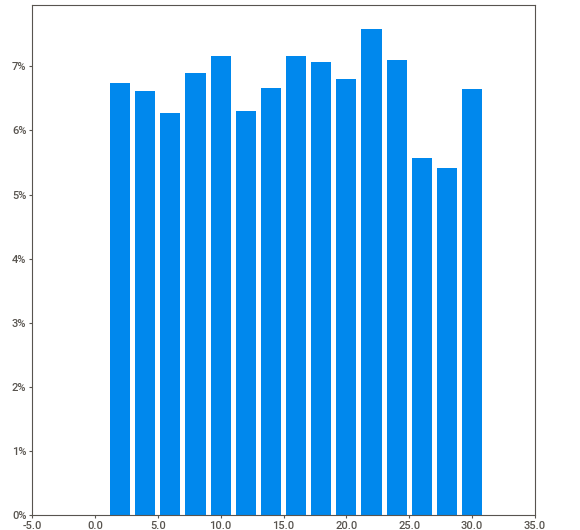
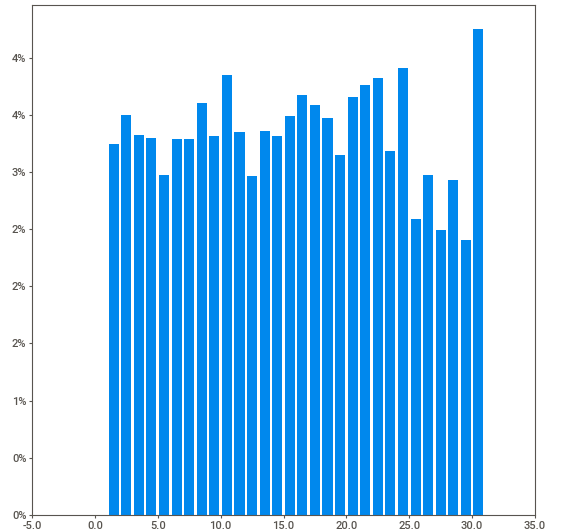
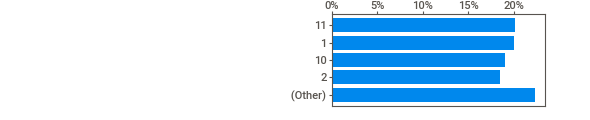
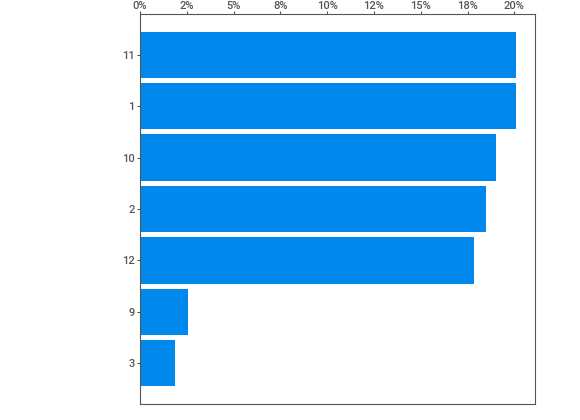
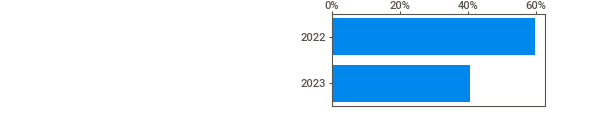
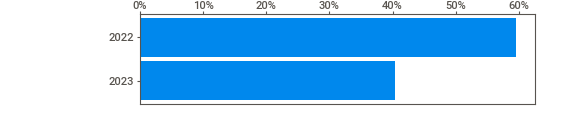
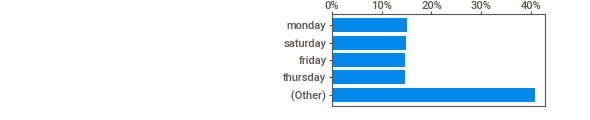
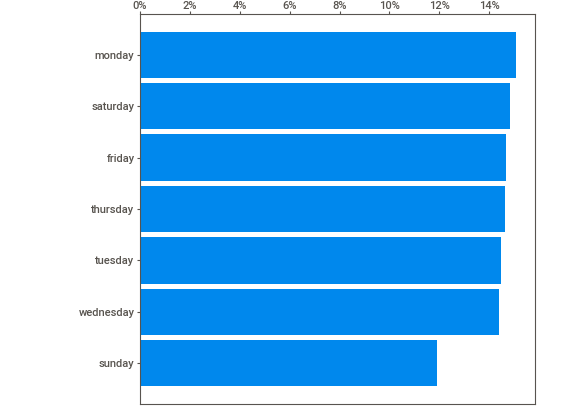
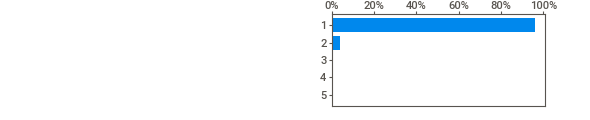
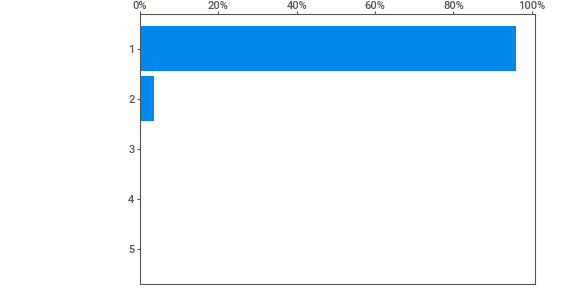
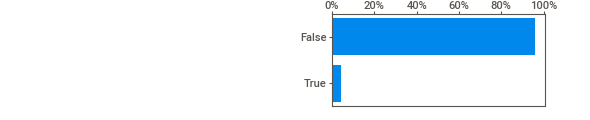
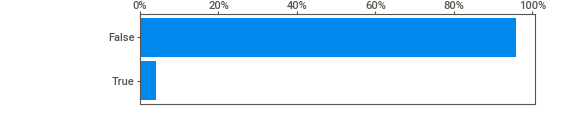
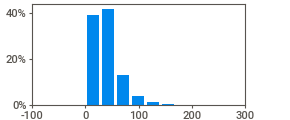
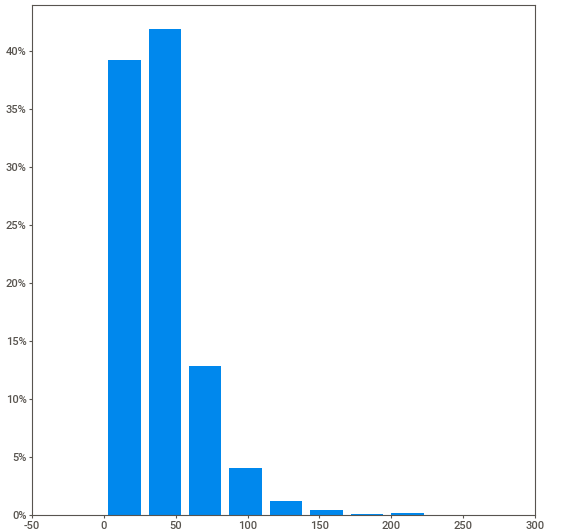
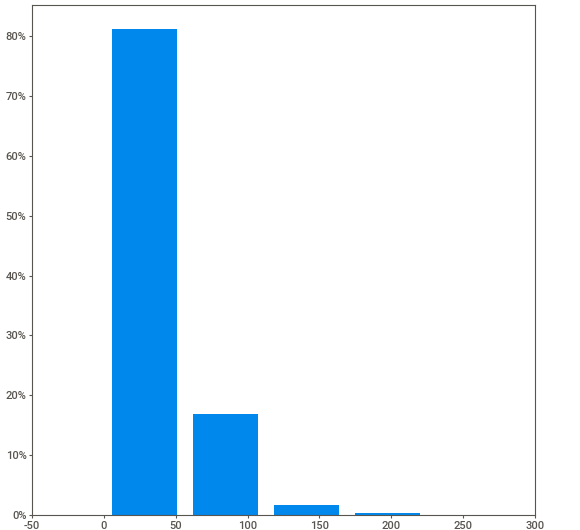
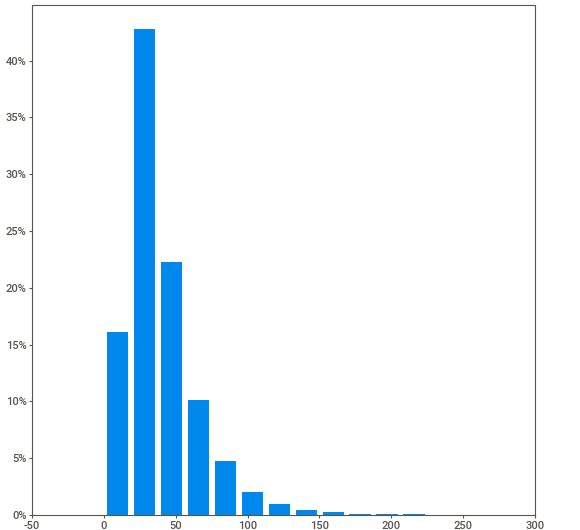
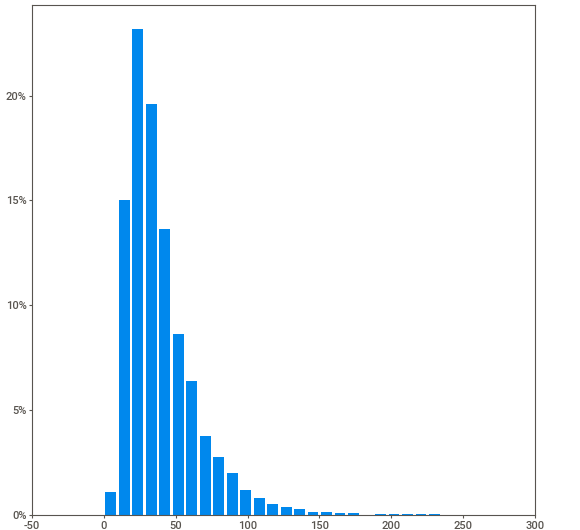
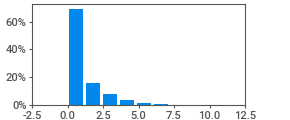
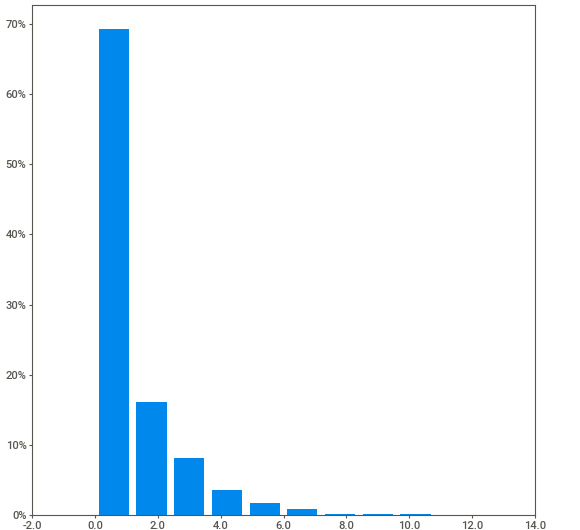
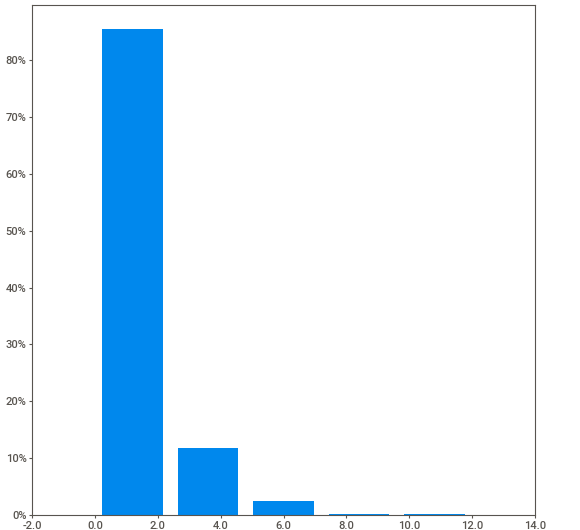
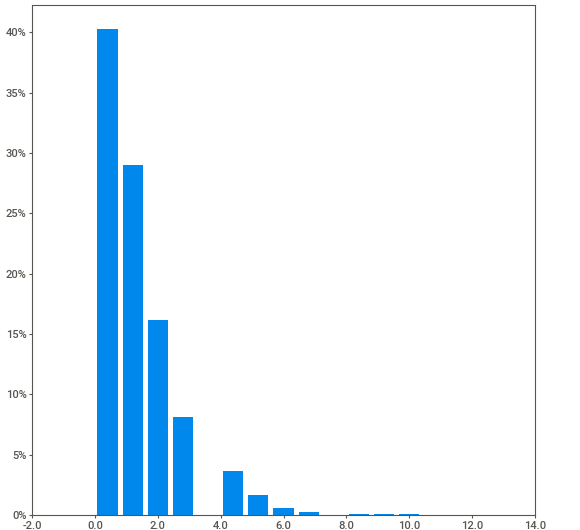
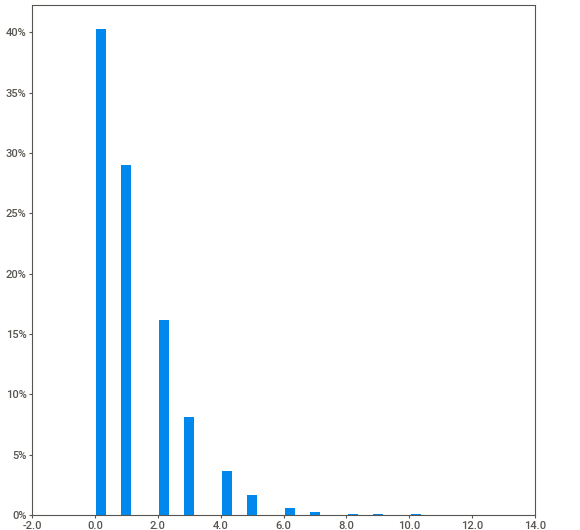
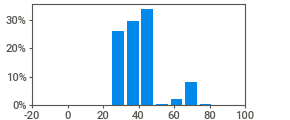
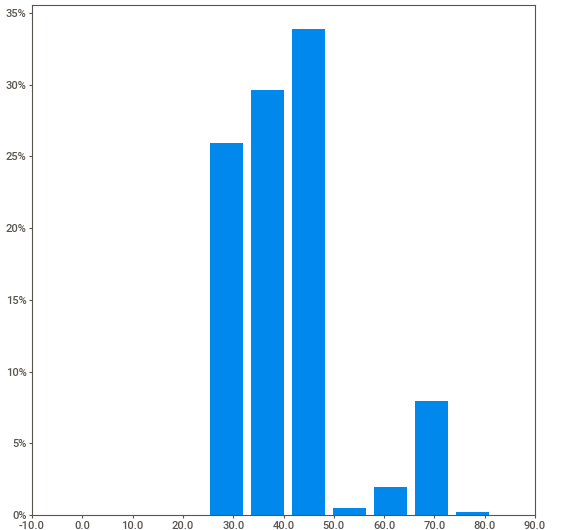
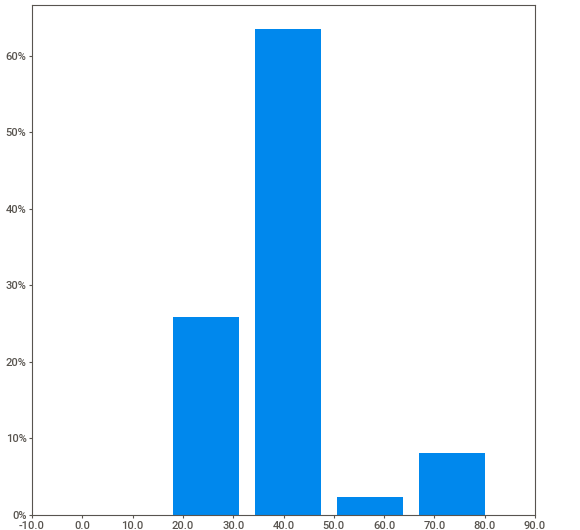
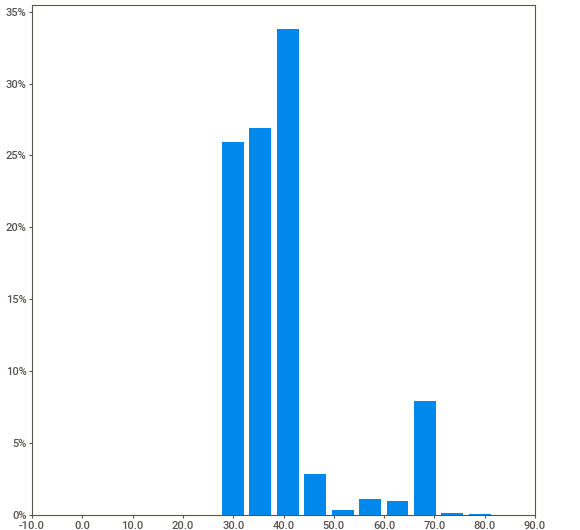
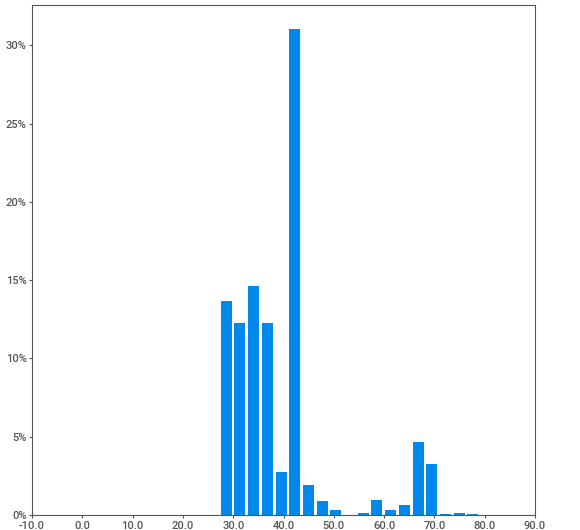
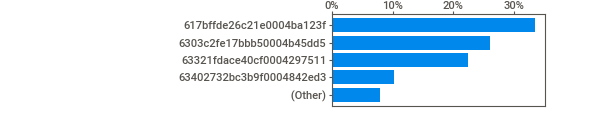
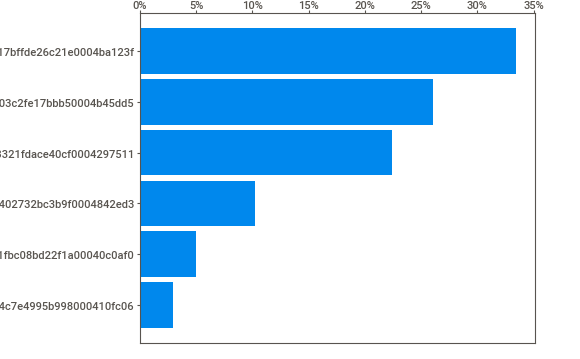
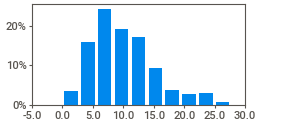
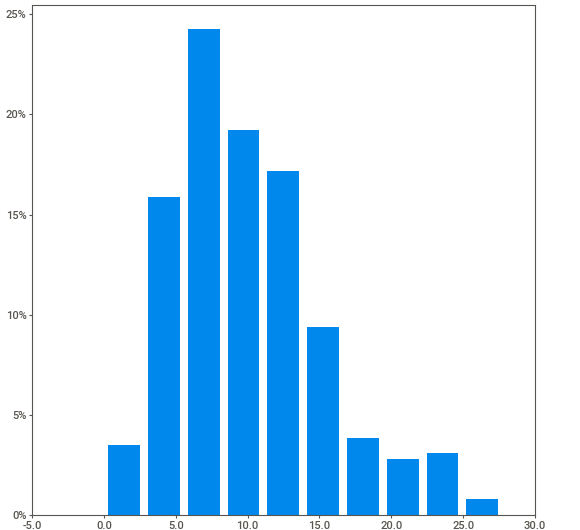
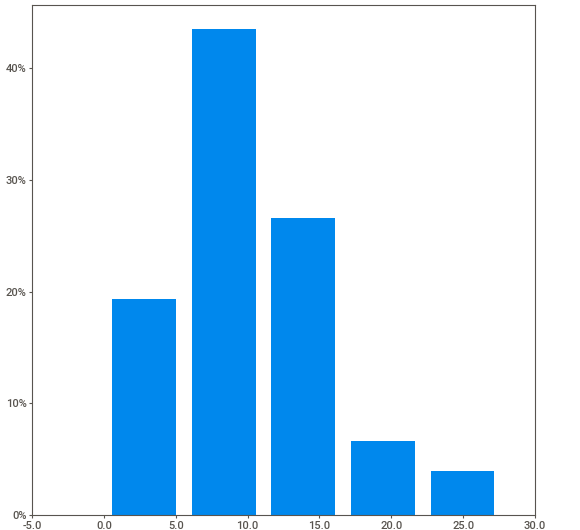
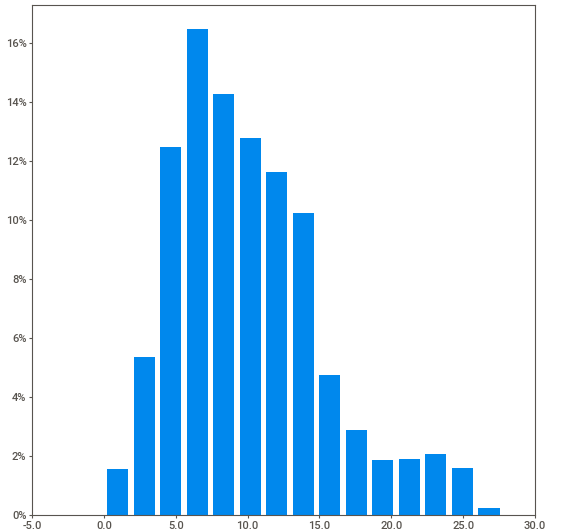
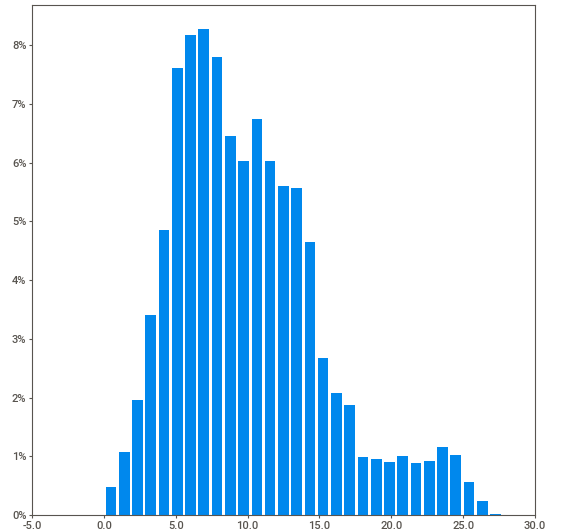
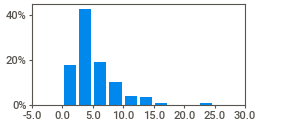
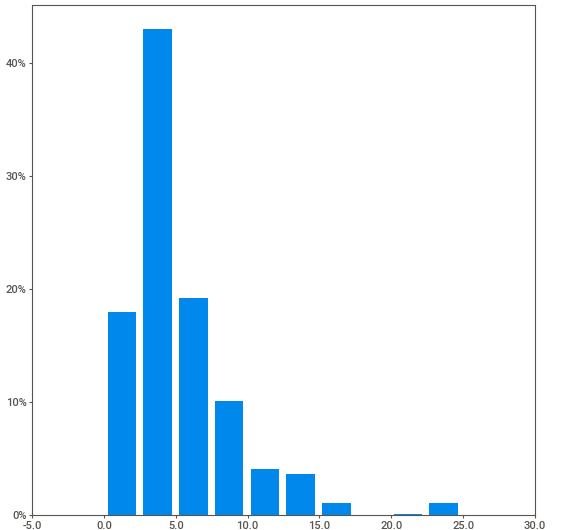
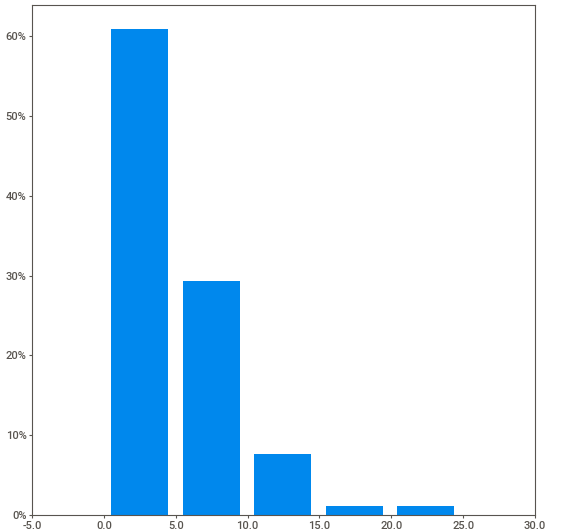
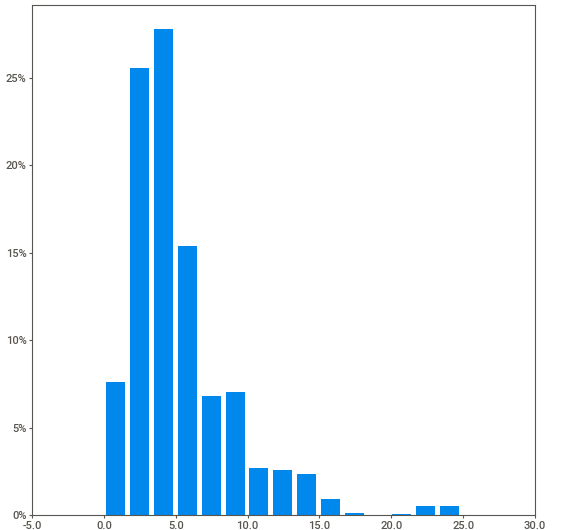
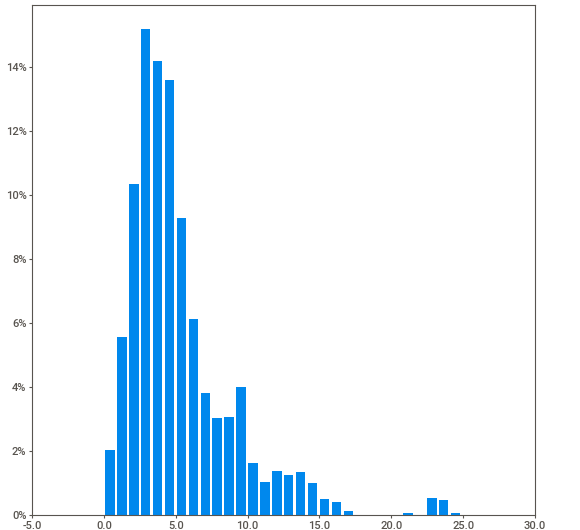
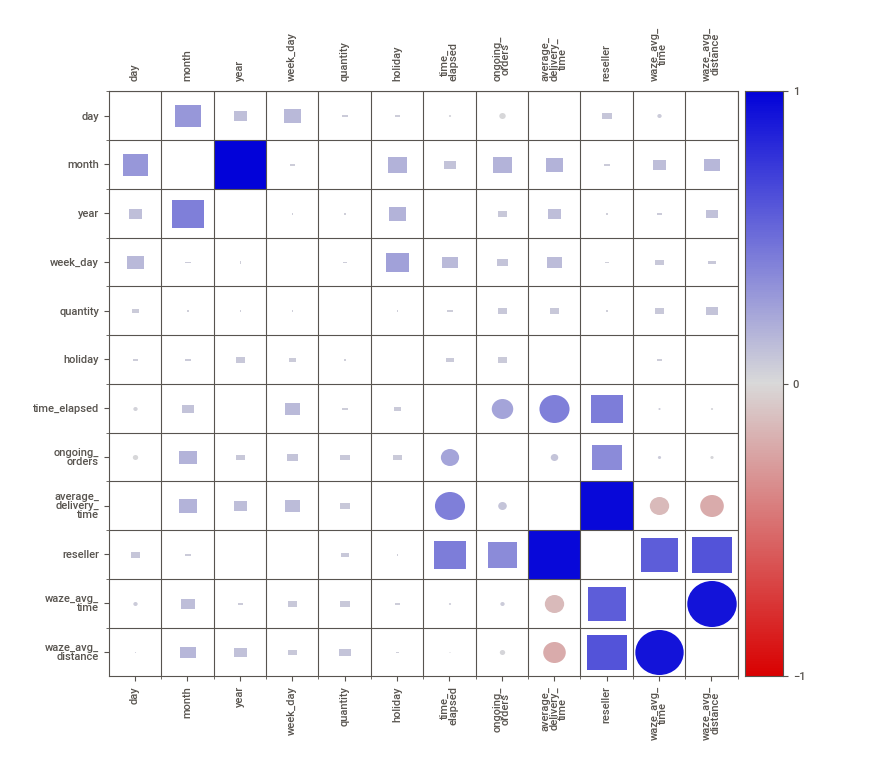
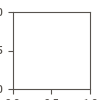

In [22]:
my_report.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)


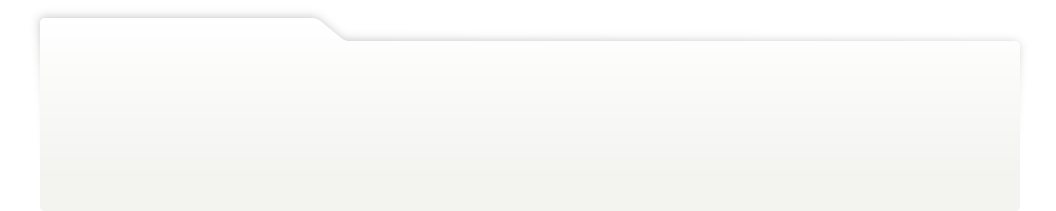
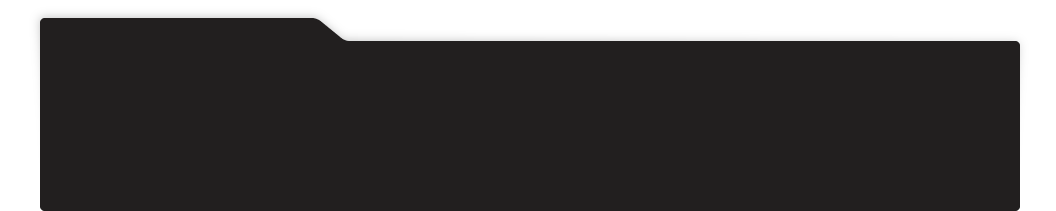
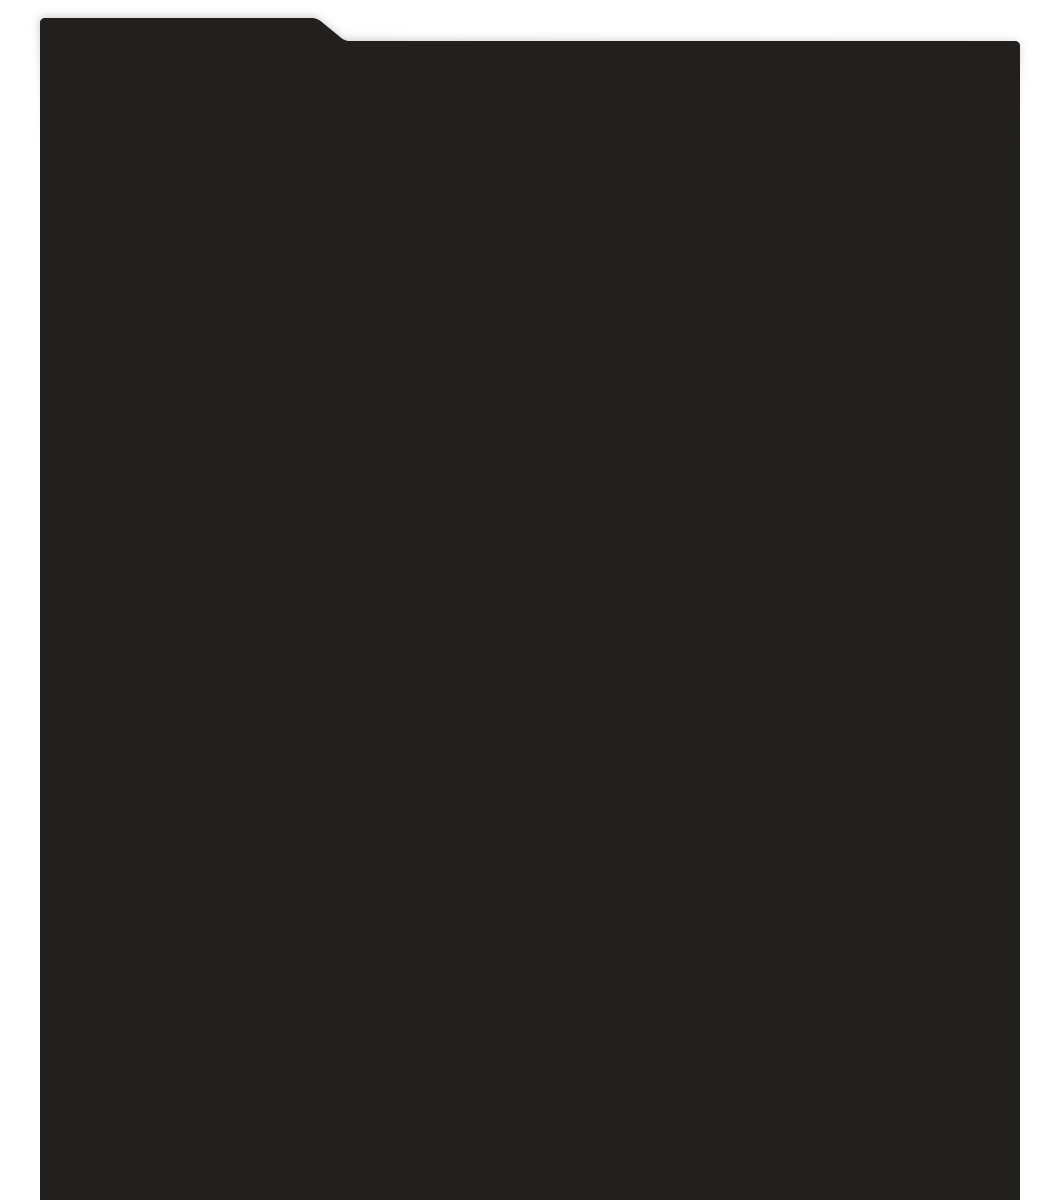
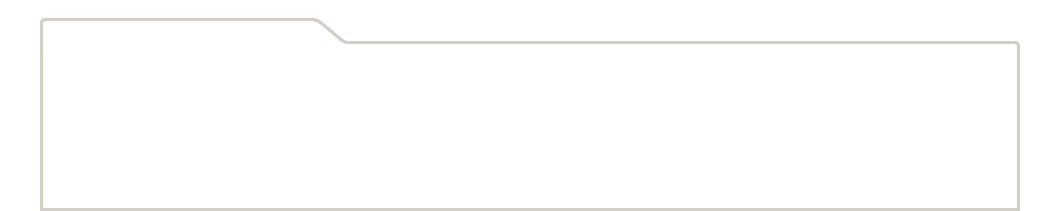
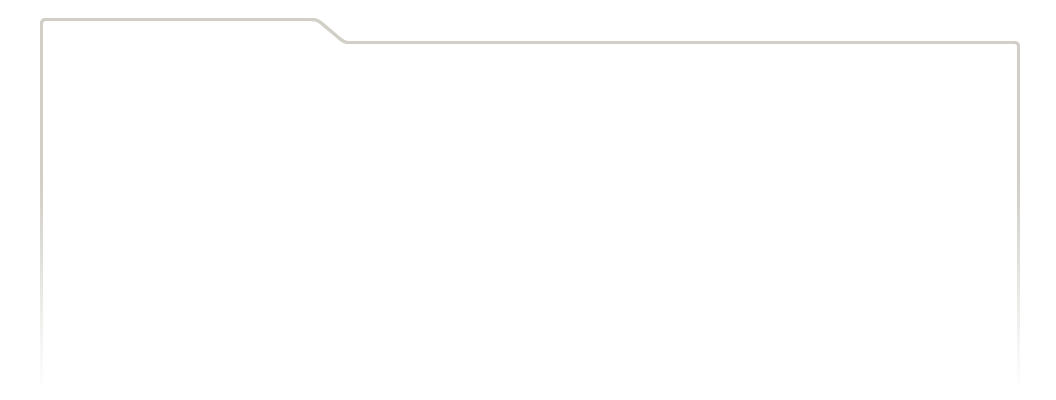
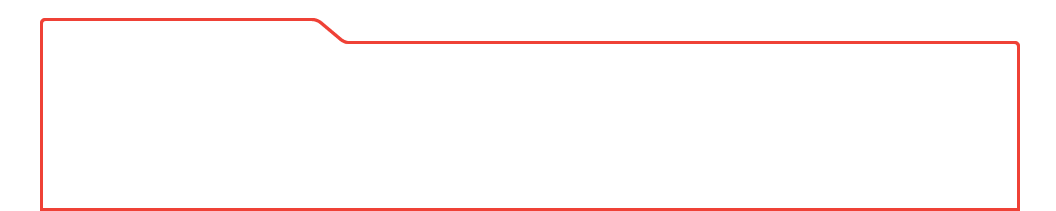
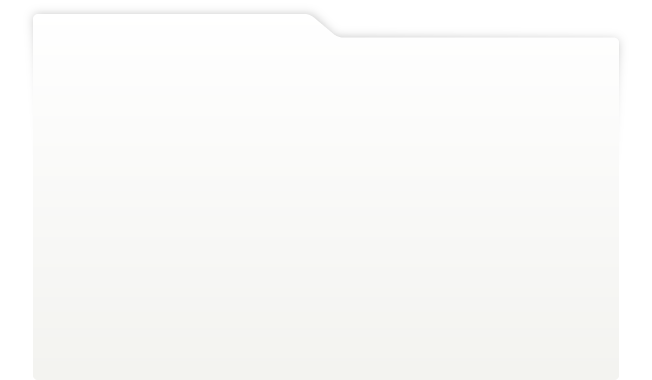
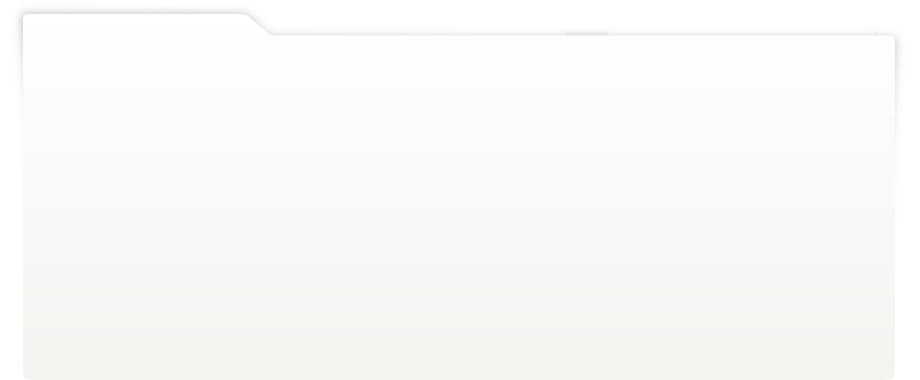
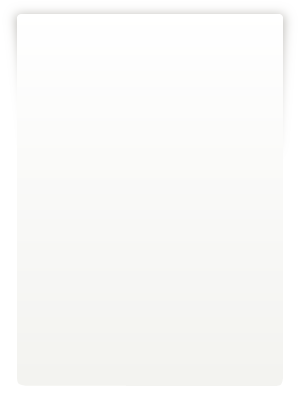
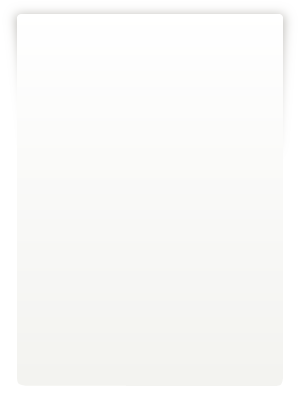
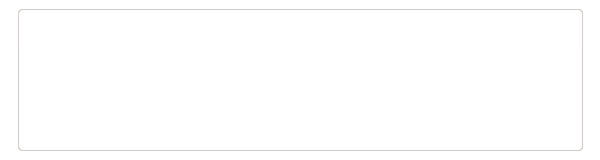
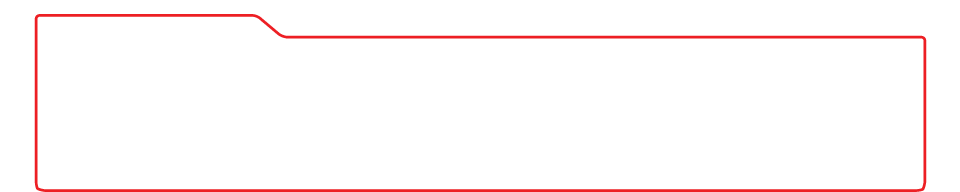
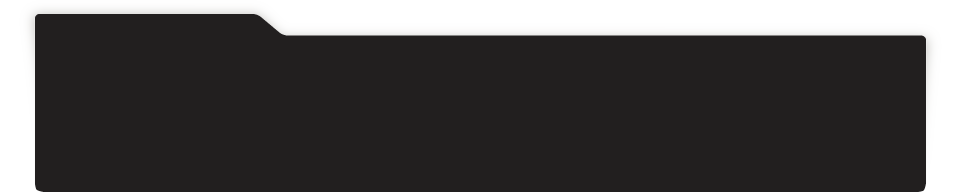
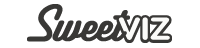
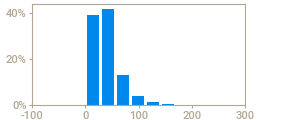
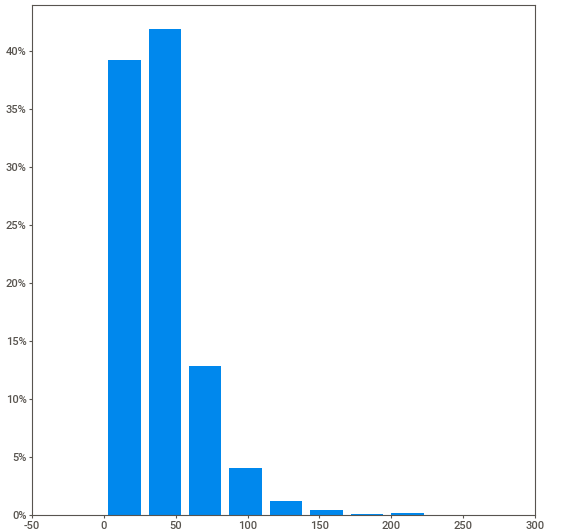
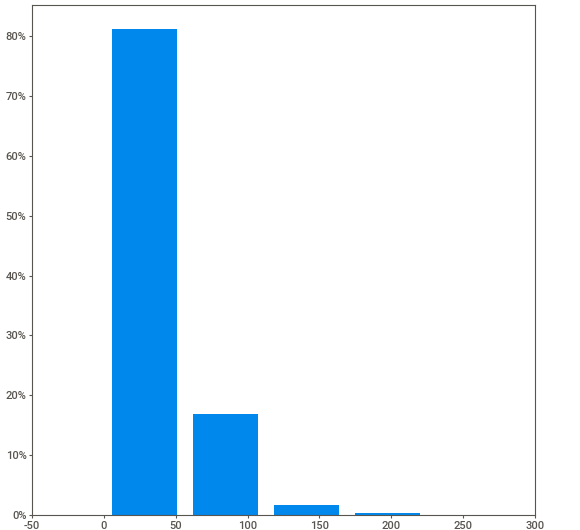
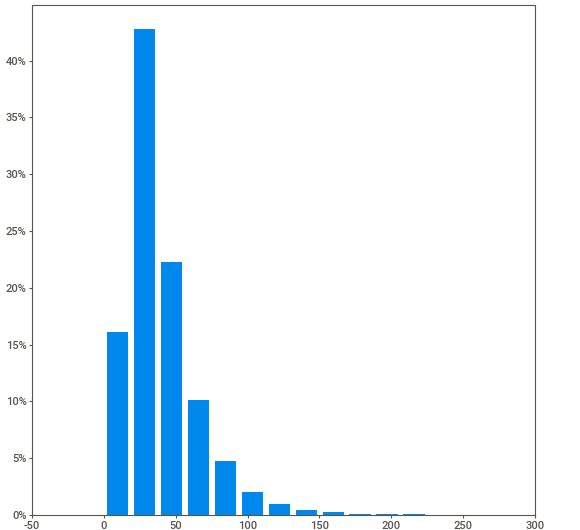
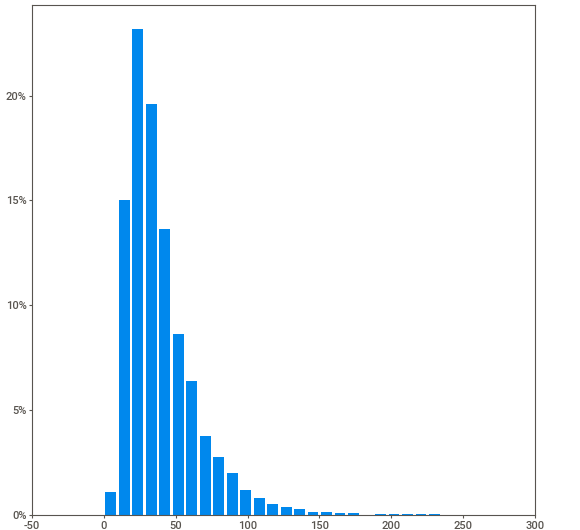
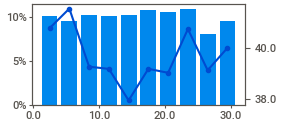
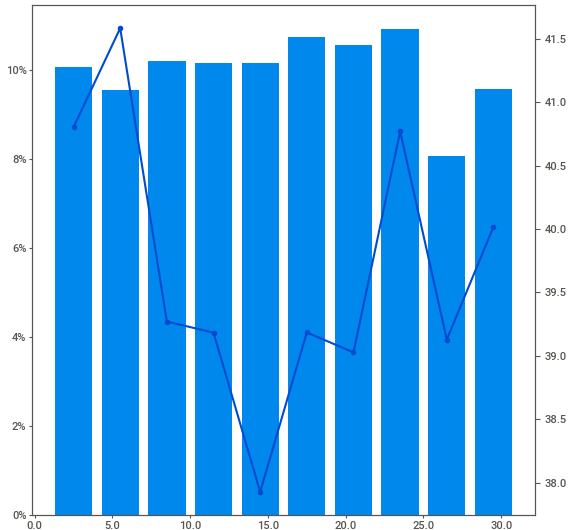
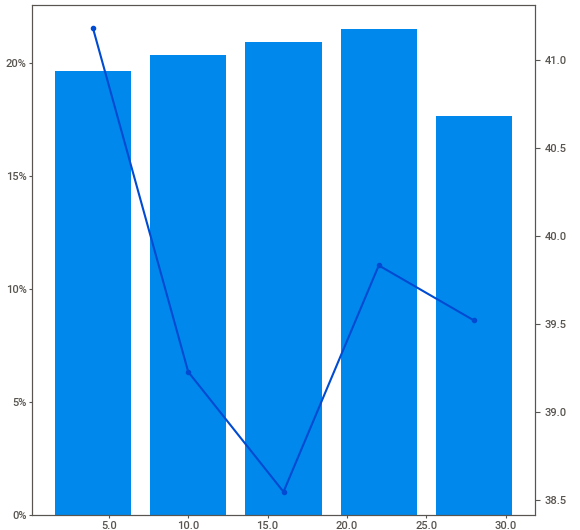
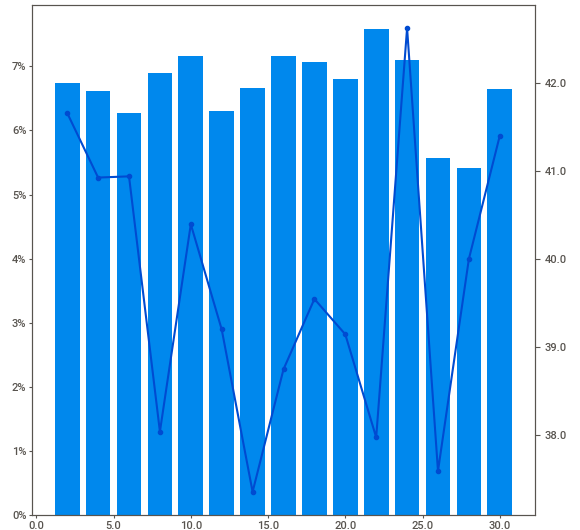
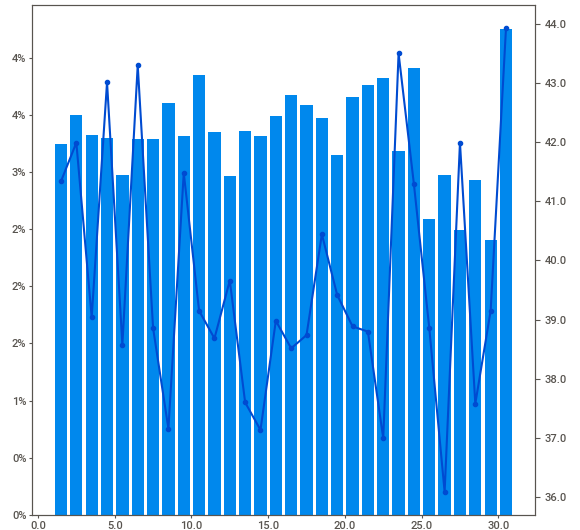
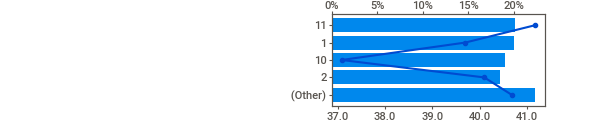
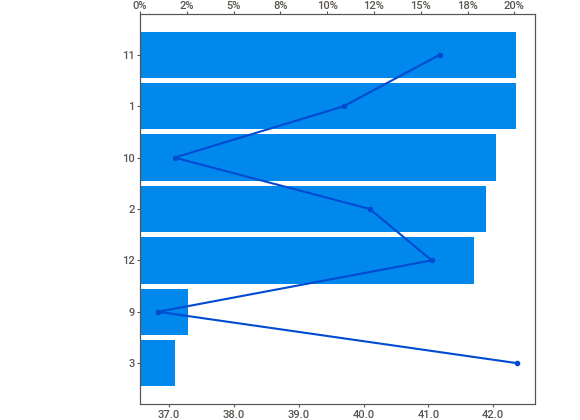
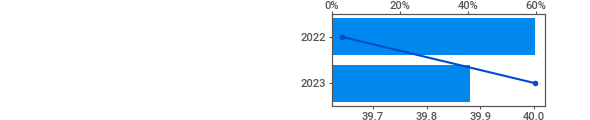
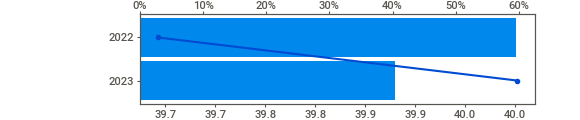
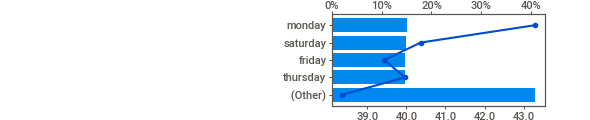
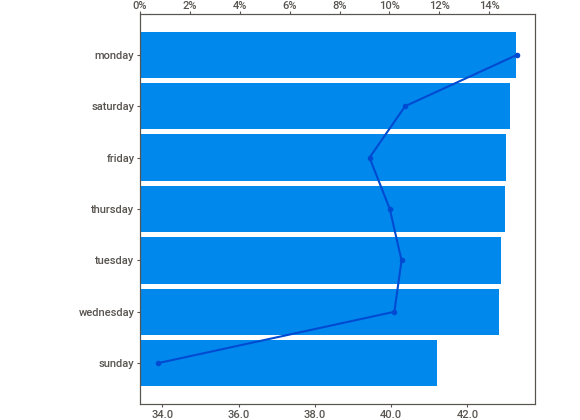
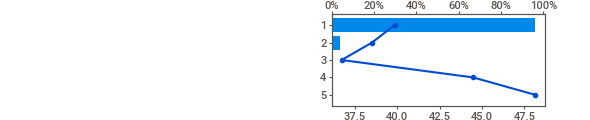
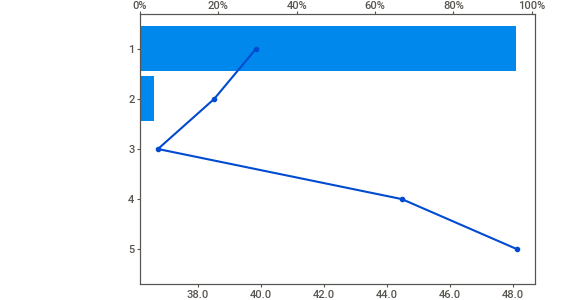
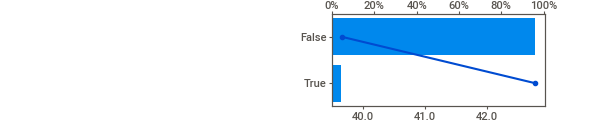
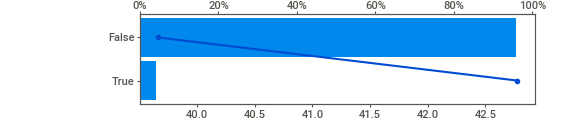
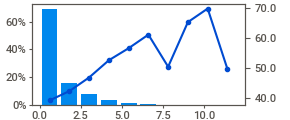
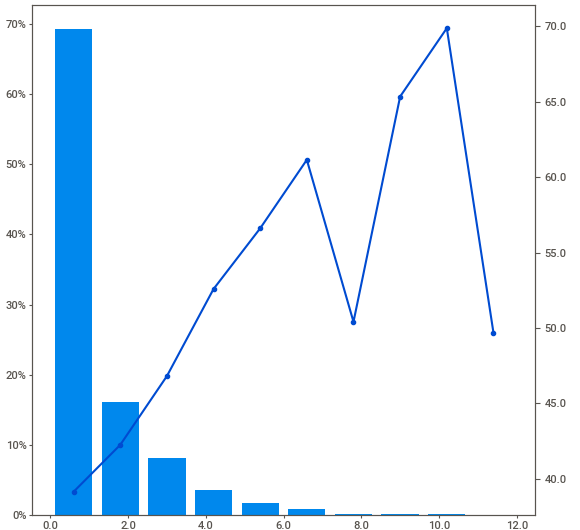
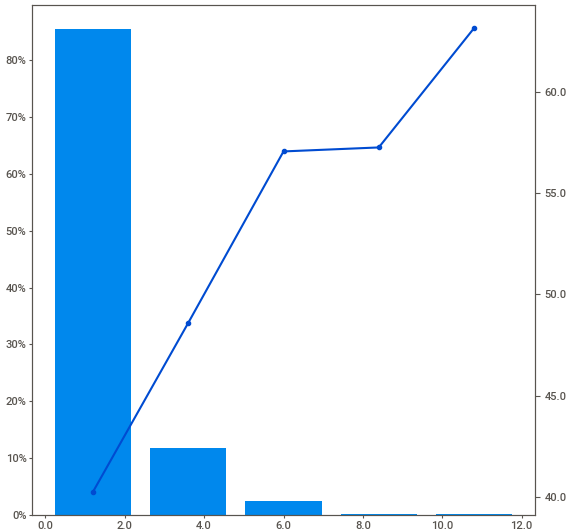
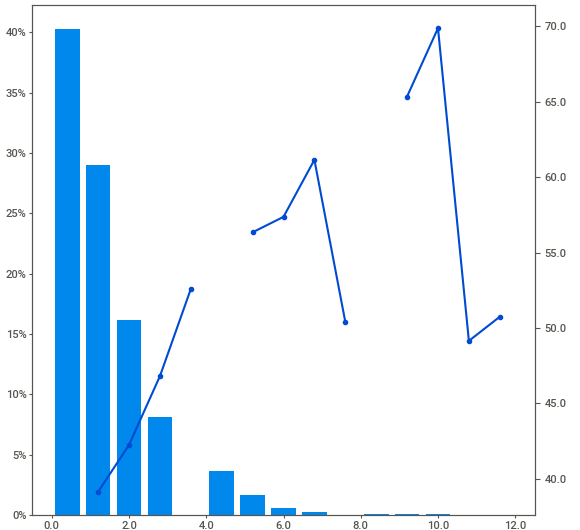
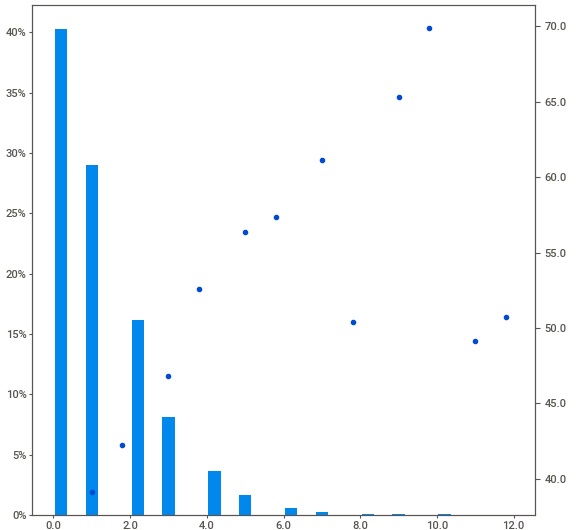
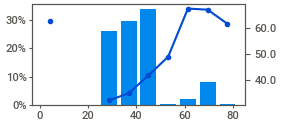
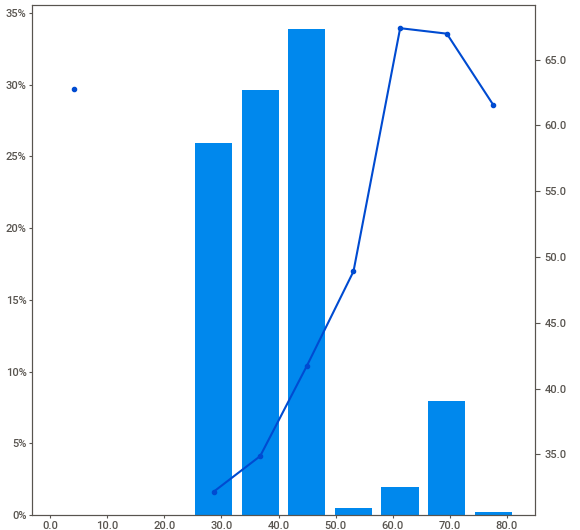
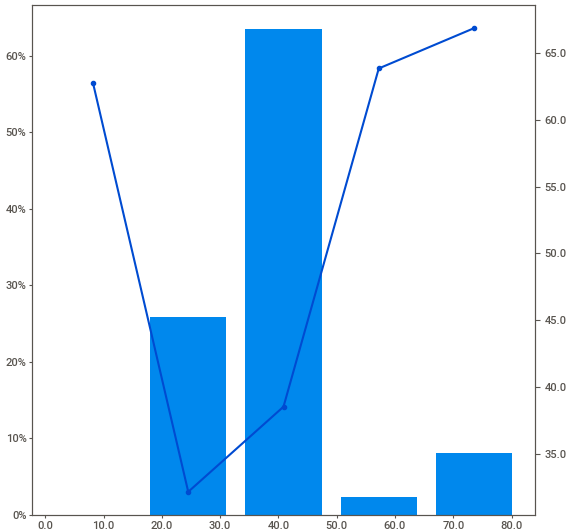
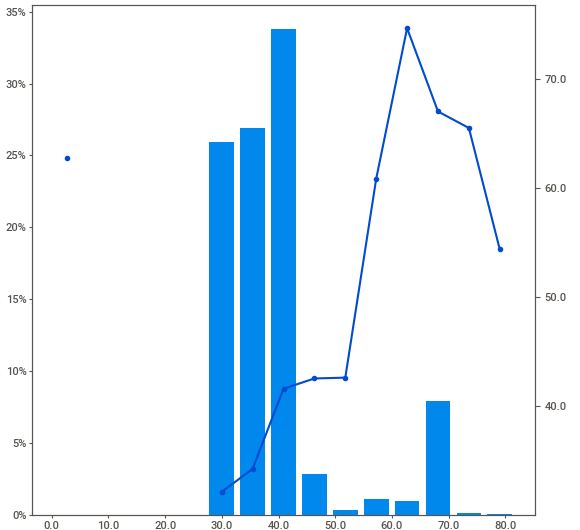
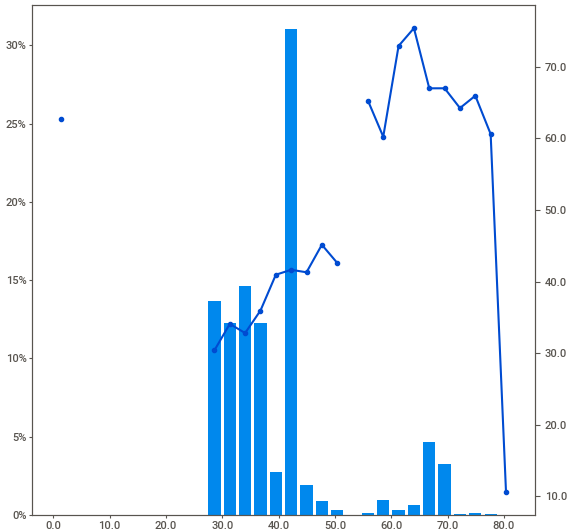
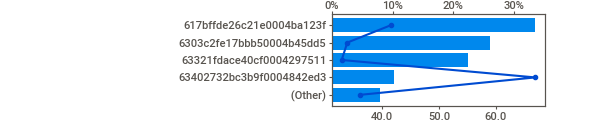
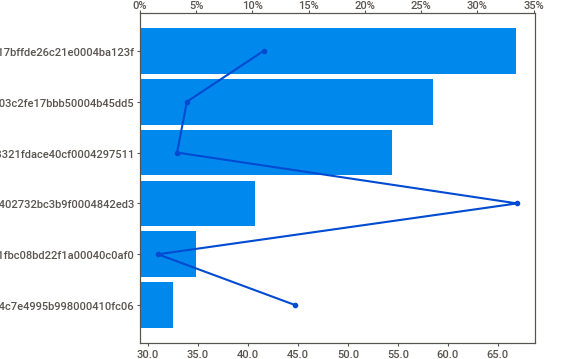
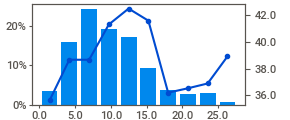
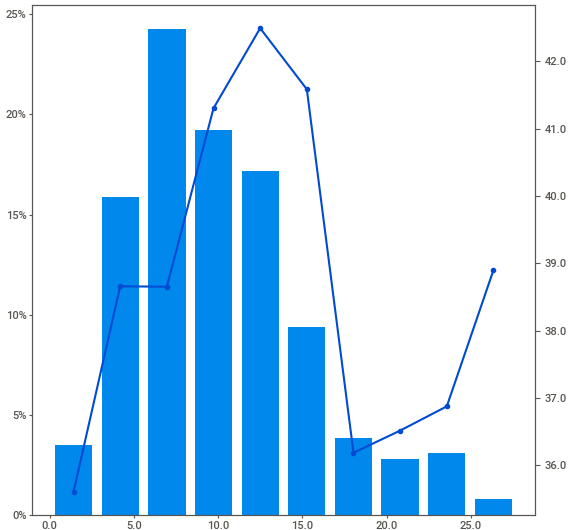
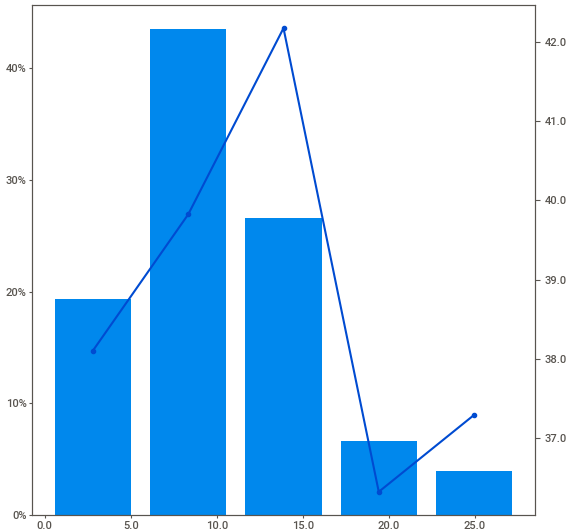
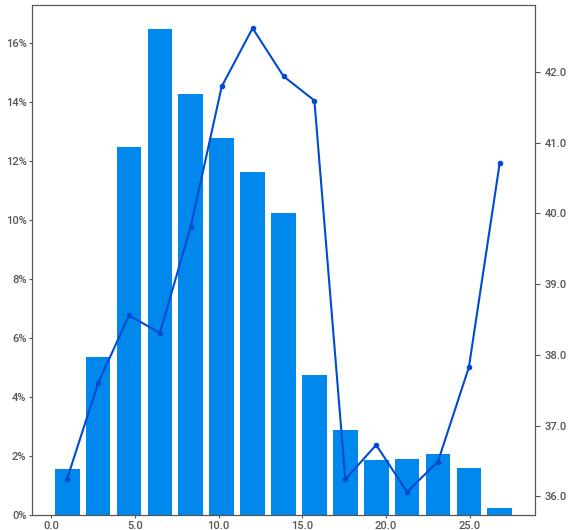
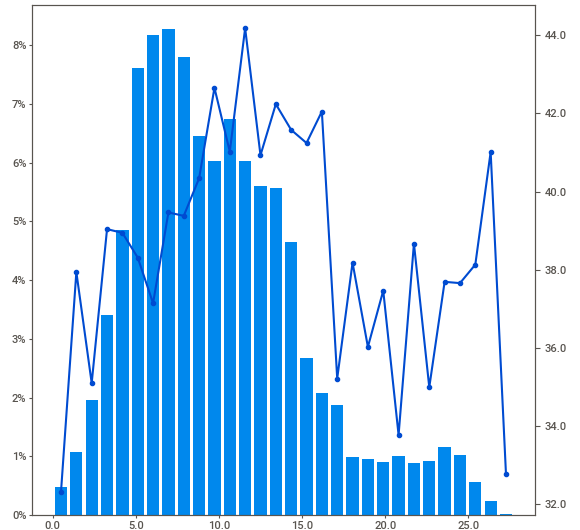
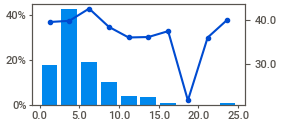
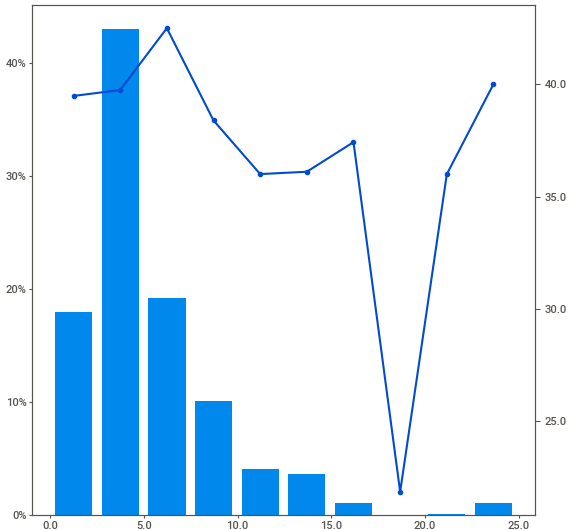
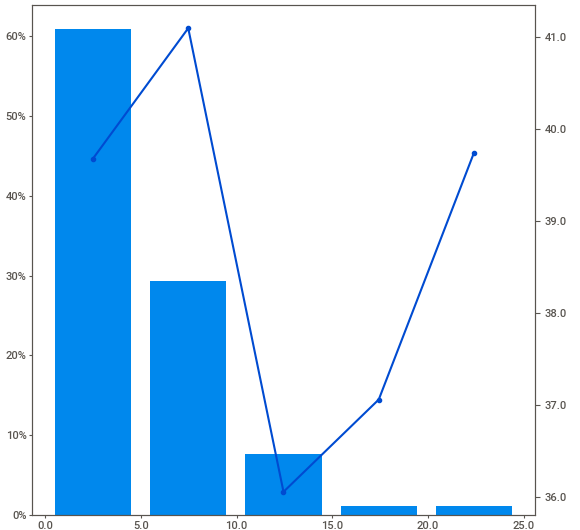
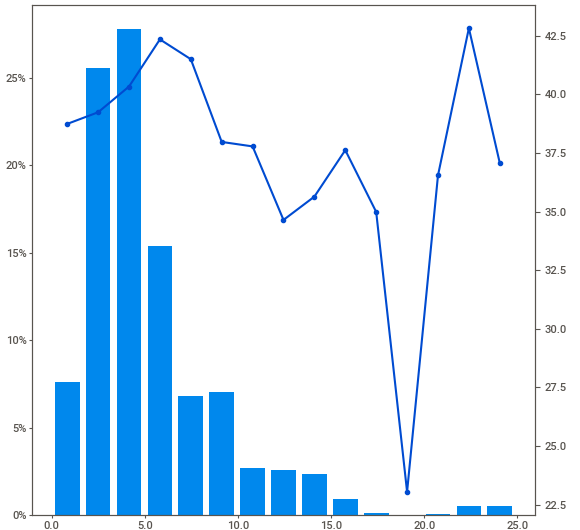
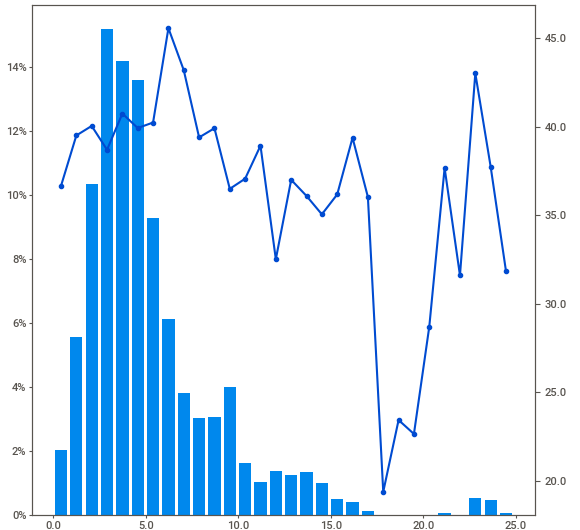
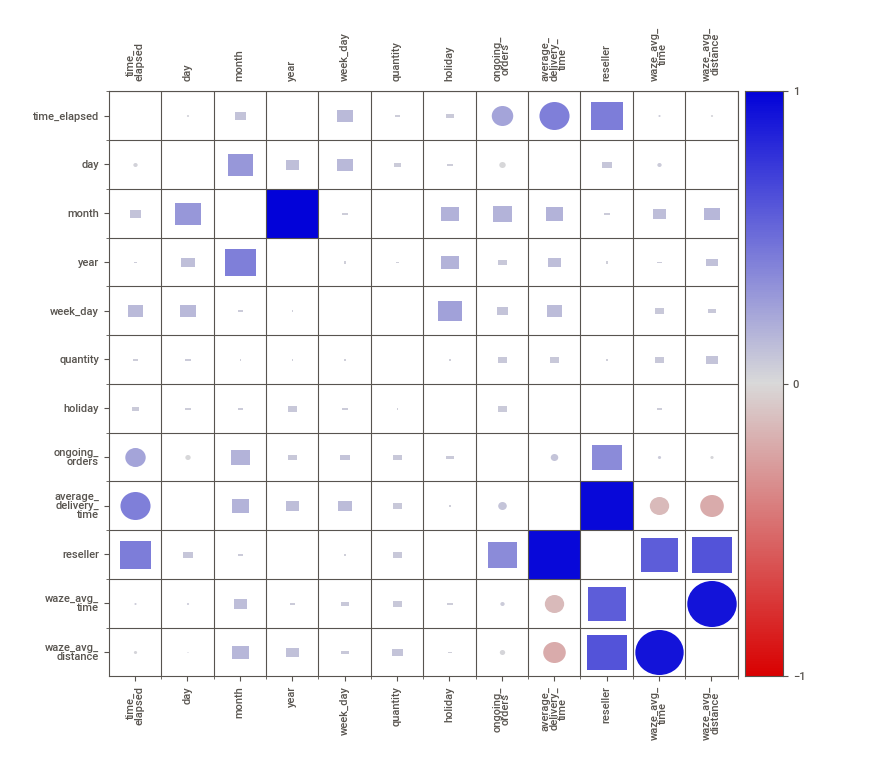
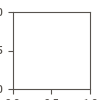

In [24]:
my_report = sweetviz.analyze(dataset, target_feat='time_elapsed')
my_report.show_notebook()

In [25]:
def bars_plot(sup_title, graficos, suptitle_y = 1.05, sup_title_fontsize = 14, sup_title_figsize = (12, 4)):
    _, ax = plt.subplots(1, len(graficos), figsize = sup_title_figsize)
    plt.suptitle(sup_title, fontsize = sup_title_fontsize, weight = 'bold', y = suptitle_y)
    
    for index, grafico in enumerate(graficos):
        ax[index].set_title(grafico.title, fontsize = grafico.fontsize, weight = 'bold')
        ax[index].bar(grafico.columns, grafico.values, alpha = grafico.alpha, **grafico.opts)
    
    plt.tight_layout()
    plt.show()

def bar_plot(grafico):
    _, ax = plt.subplots(figsize = grafico.figsize)
    
    ax.set_xlabel(grafico.xlabel)
    ax.set_ylabel(grafico.ylabel)
    ax.set_title(grafico.title, fontsize = grafico.fontsize, weight = 'bold')
    ax.bar(grafico.columns, grafico.values, alpha = grafico.alpha, **grafico.opts)
    
    plt.tight_layout()
    plt.show()

def multi_bar_plot(graficos, legend_title):
    _, ax = plt.subplots(figsize = graficos[0].figsize)
    
    for _, grafico in enumerate(graficos):
        ax.bar(grafico.columns, grafico.values, alpha = grafico.alpha, **grafico.opts)
    ax.set_xlabel(graficos[0].xlabel)
    ax.set_ylabel(graficos[0].ylabel)
    ax.set_title(graficos[0].title, fontsize = graficos[0].fontsize, weight = 'bold')

    plt.legend(title=legend_title)
    plt.show()

In [26]:
def hists_plot(sup_title, graficos, suptitle_y = 1.05, sup_title_fontsize = 14, sup_title_figsize = (12, 4)):
    _, ax = plt.subplots(1, len(graficos), figsize = sup_title_figsize)
    plt.suptitle(sup_title, fontsize = sup_title_fontsize, weight = 'bold', y = suptitle_y)
    
    for index, grafico in enumerate(graficos):
        ax[index].set_title(grafico.title, fontsize = grafico.fontsize, weight = 'bold')
        ax[index].hist(grafico.values, bins = grafico.bins, alpha = grafico.alpha, **grafico.opts)
    
    plt.tight_layout()
    plt.show()
    
def hist_plot(grafico):
    _, ax = plt.subplots(figsize = grafico.figsize)

    ax.set_xlabel(grafico.xlabel)
    ax.set_ylabel(grafico.ylabel)
    ax.set_title(grafico.title, fontsize = grafico.fontsize, weight = 'bold')
    ax.hist(grafico.values, bins = grafico.bins, alpha = grafico.alpha, **grafico.opts)
    
    plt.tight_layout()
    plt.show()

def multi_hist_plot(graficos, legend_title):
    _, ax = plt.subplots(figsize = graficos[0].figsize)
    
    for _, grafico in enumerate(graficos):
        ax.hist(grafico.values, bins = grafico.bins, alpha = grafico.alpha, **grafico.opts)
    
    ax.set_title(graficos[0].title, fontsize = graficos[0].fontsize, weight = 'bold')
    ax.set_xlabel(graficos[0].xlabel)
    ax.set_ylabel(graficos[0].ylabel)

    plt.legend(title=legend_title)
    plt.show()

# Derivando datas e horas

In [27]:
def hour_to_dec(time):
  hour, minutes = str(time).split(':')
  return round(float(hour) + float(minutes) / 60.0, 2)

In [28]:
derivations = []

for index, row in dataset.iterrows():    
    datetime_args = dict(
        year = int(row['year']),
        month = int(row['month']),
        day = int(row['day']),
        hour = int(row['hour'].split(':')[0]),
        minute = int(row['hour'].split(':')[1])
    )
    date_args = dict(
        year = int(row['year']),
        month = int(row['month']),
        day = int(row['day'])
    )
    derivations.append([
        datetime(**datetime_args),
        date(**date_args),
        hour_to_dec(row['hour']),
        weekdays[row['week_day']]
    ])
    
tmp_df = pd.DataFrame(derivations, columns=['datetime', 'date', 'time_decimal', 'weekday_index'])
dataset = pd.concat([dataset, tmp_df], axis=1)

dataset.head()

,day,month,year,hour,week_day,quantity,holiday,time_elapsed,ongoing_orders,average_delivery_time,reseller,waze_avg_time,waze_avg_distance,datetime,date,time_decimal,weekday_index
0,3,3,2023,17:49,friday,1,False,64.123500,2,40.578217,617bffde26c21e0004ba123f,9.033333,3.470,2023-03-03 17:49:00,2023-03-03,17.82,5
1,3,3,2023,17:07,friday,1,False,45.047067,4,40.560233,617bffde26c21e0004ba123f,11.266667,4.414,2023-03-03 17:07:00,2023-03-03,17.12,5
2,3,3,2023,17:01,friday,1,False,48.551800,3,40.556667,617bffde26c21e0004ba123f,9.483333,4.122,2023-03-03 17:01:00,2023-03-03,17.02,5
3,3,3,2023,16:42,friday,1,False,45.278300,5,40.554567,617bffde26c21e0004ba123f,14.300000,5.939,2023-03-03 16:42:00,2023-03-03,16.70,5
4,3,3,2023,16:25,friday,1,False,53.148500,3,40.550617,617bffde26c21e0004ba123f,11.016667,3.971,2023-03-03 16:25:00,2023-03-03,16.42,5


# Análise Exploratória

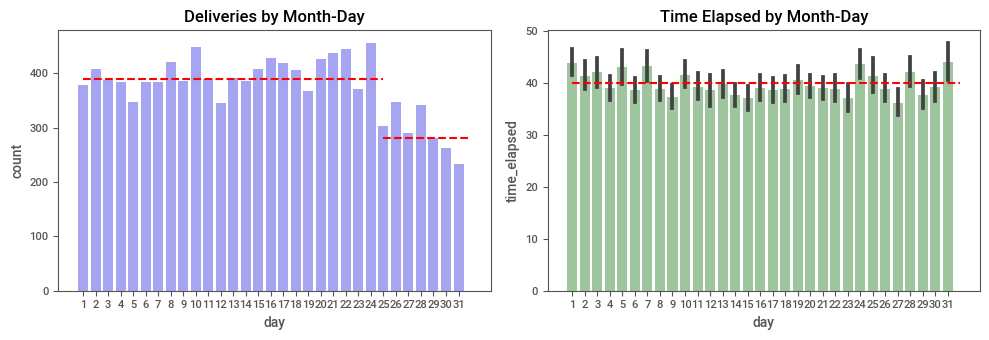

Weak or no relations appeared
                   day  time_elapsed
day           1.000000     -0.017384
time_elapsed -0.017384      1.000000


In [95]:
import seaborn as sns 
fig, ax = plt.subplots(1,2,figsize=(10,3.5))

sns.countplot(x=dataset['day'],ax=ax[0],color='blue',alpha=0.4)
ax[0].set_title('Deliveries by Month-Day')

ax[0].hlines(390,0,24,color='r',linestyle='--')
ax[0].hlines(280,24,31,color='r',linestyle='--')

sns.barplot(x=dataset['day'], y=dataset['time_elapsed'],ax=ax[1],color='green',alpha=0.4)
ax[1].set_title('Time Elapsed by Month-Day')

ax[1].hlines(40,0,31,color='r',linestyle='--')

plt.tight_layout()
plt.show()

print('Weak or no relations appeared')
print(dataset[['day','time_elapsed']].corr())

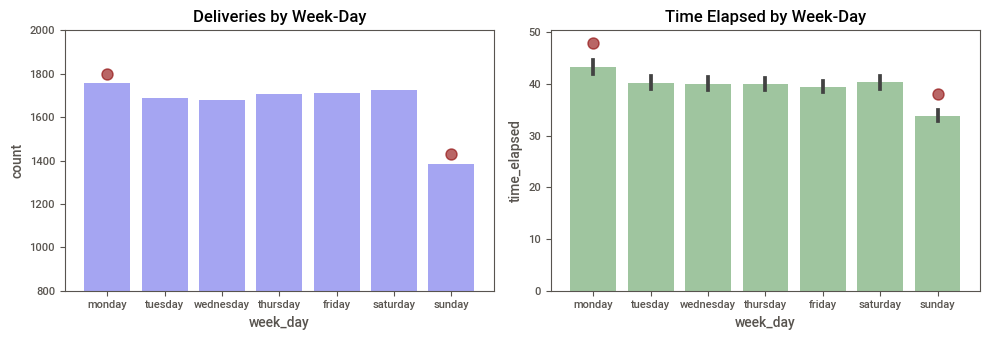

Tight relations appeared


In [124]:
import seaborn as sns 
fig, ax = plt.subplots(1,2,figsize=(10,3.5))

sns.countplot(x=dataset['week_day'],order=['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'],
              ax=ax[0],color='blue',alpha=0.4)
ax[0].set_ylim([800, 2000])
ax[0].set_title('Deliveries by Week-Day')

ax[0].plot(0,1800,marker='o',markersize=8,color='darkred',alpha=0.6)
ax[0].plot(6,1430,marker='o',markersize=8,color='darkred',alpha=0.6)

sns.barplot(x=dataset['week_day'], y=dataset['time_elapsed'],order=['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'], 
            ax=ax[1],color='green',alpha=0.4)
ax[1].set_title('Time Elapsed by Week-Day')

ax[1].plot(0,48,marker='o',markersize=8,color='darkred',alpha=0.6)
ax[1].plot(6,38,marker='o',markersize=8,color='darkred',alpha=0.6)

plt.tight_layout()
plt.show()

print('Tight relations appeared')

In [89]:
dict(zip(dataset.reseller.unique(),['A','B','C','D','E','F']))

{'617bffde26c21e0004ba123f': 'A',
 '61fbc08bd22f1a00040c0af0': 'B',
 '624c7e4995b998000410fc06': 'C',
 '6303c2fe17bbb50004b45dd5': 'D',
 '63321fdace40cf0004297511': 'E',
 '63402732bc3b9f0004842ed3': 'F'}

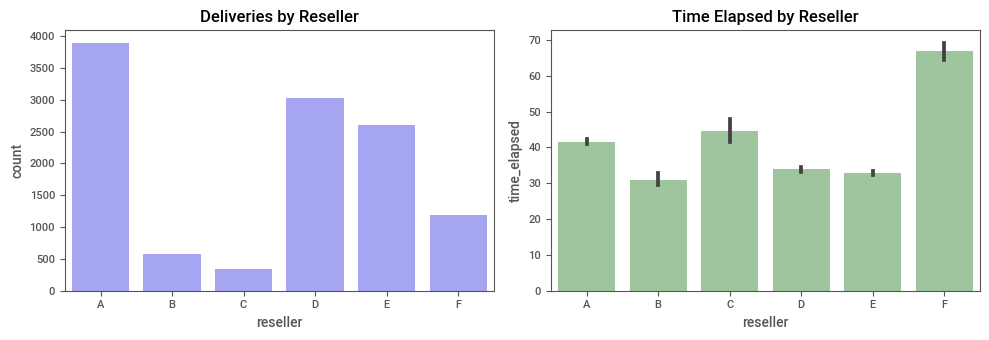

No evident relations


In [93]:
import seaborn as sns 
fig, ax = plt.subplots(1,2,figsize=(10,3.5))

reseller_map = dict(zip(dataset.reseller.unique(),['A','B','C','D','E','F']))

sns.countplot(x=dataset['reseller'].map(reseller_map), ax=ax[0],color='blue',alpha=0.4)
ax[0].set_title('Deliveries by Reseller')

sns.barplot(x=dataset['reseller'].map(reseller_map), y=dataset['time_elapsed'],ax=ax[1],color='green',alpha=0.4)
ax[1].set_title('Time Elapsed by Reseller')

plt.tight_layout()
plt.show()

print('No evident relations')

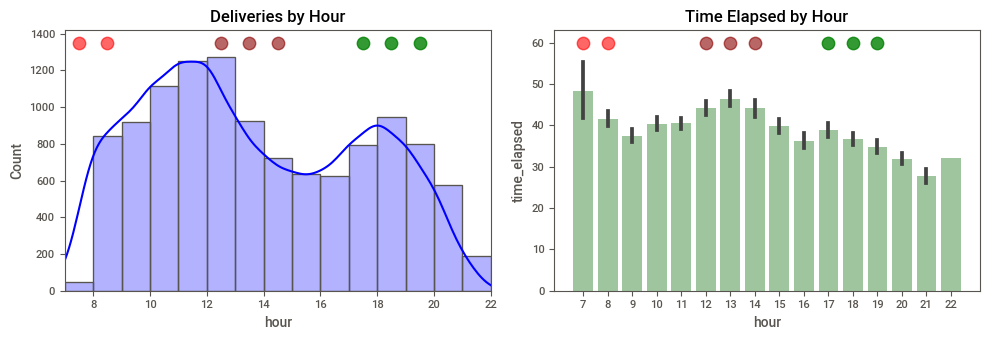

Relations with Traffic


In [137]:
import seaborn as sns 
import numpy as np
fig, ax = plt.subplots(1,2,figsize=(10,3.5))

sns.histplot(x=dataset['hour'].apply(lambda x: int(x.split(':')[0])), ax=ax[0],color='blue',alpha=0.3,bins=np.arange(0,25),kde=True)
ax[0].set_title('Deliveries by Hour')
ax[0].set_xlim([7,22])

ax[0].scatter(np.array([12,13,14])+0.5,[1350,1350,1350],s=80,color='darkred',alpha=0.6)
ax[0].scatter(np.array([7,8])+0.5,[1350,1350],s=80,color='red',alpha=0.6)
ax[0].scatter(np.array([17,18,19])+0.5,[1350,1350,1350],s=80,color='green',alpha=0.8)

sns.barplot(x=dataset['hour'].apply(lambda x: int(x.split(':')[0])), y=dataset['time_elapsed'],ax=ax[1],color='green',alpha=0.4)
ax[1].set_title('Time Elapsed by Hour')

ax[1].scatter(np.array([12,13,14])-7,[60,60,60],s=80,color='darkred',alpha=0.6)
ax[1].scatter(np.array([7,8])-7,[60,60],s=80,color='red',alpha=0.6)
ax[1].scatter(np.array([17,18,19])-7,[60,60,60],s=80,color='green',alpha=0.8)

plt.tight_layout()
plt.show()

print('Relations with Traffic')

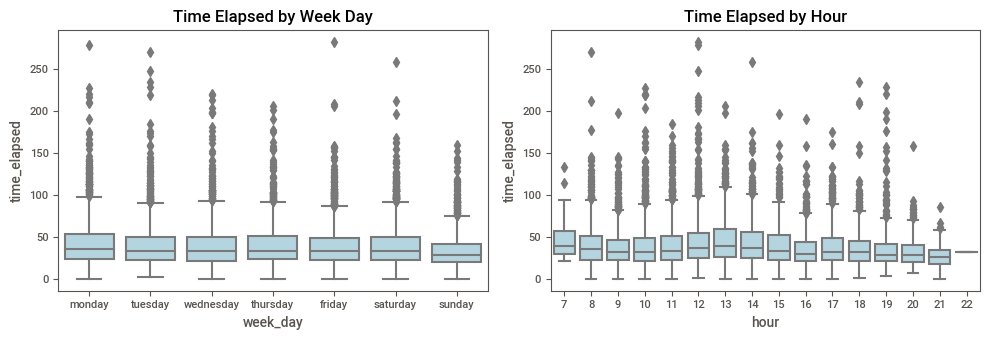

Many outliers


In [179]:
import seaborn as sns 
import numpy as np
fig, ax = plt.subplots(1,2,figsize=(10,3.5))

sns.boxplot(y='time_elapsed', x='week_day', data=dataset, ax=ax[0], color='lightblue',order=['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'])
ax[0].set_title('Time Elapsed by Week Day')

df = dataset[['time_elapsed']].copy()
df['hour'] = dataset['hour'].apply(lambda x: int(x.split(':')[0]))

sns.boxplot(y='time_elapsed', x='hour', data=df, ax=ax[1], color='lightblue')
ax[1].set_title('Time Elapsed by Hour')

plt.tight_layout()
plt.show()

print('Many outliers')

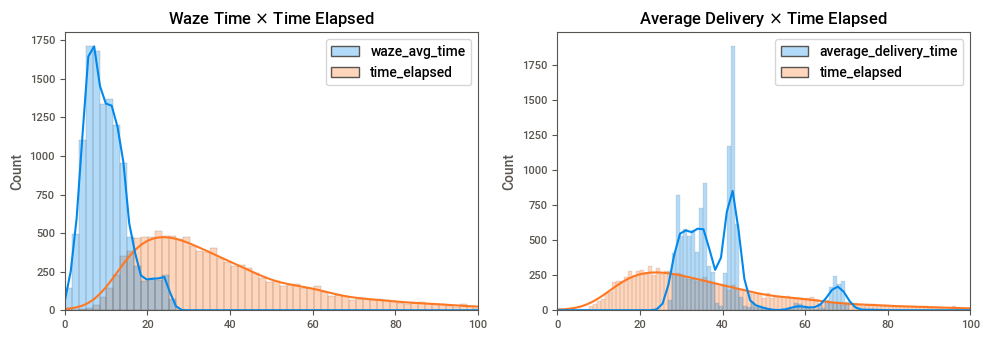

Week correlations, but Elapse Time >> Waze Time
               waze_avg_time  time_elapsed
waze_avg_time       1.000000      0.013257
time_elapsed        0.013257      1.000000
                       average_delivery_time  time_elapsed
average_delivery_time               1.000000      0.388144
time_elapsed                        0.388144      1.000000


In [156]:
import seaborn as sns 
import numpy as np
fig, ax = plt.subplots(1,2,figsize=(10,3.5))

sns.histplot(dataset[['waze_avg_time','time_elapsed']], ax=ax[0],color='blue',alpha=0.3,kde=True)
ax[0].set_title('Waze Time $\\times$ Time Elapsed')
ax[0].set_xlim([0,100])

sns.histplot(dataset[['average_delivery_time','time_elapsed']], ax=ax[1],color='blue',alpha=0.3,kde=True)
ax[1].set_title('Average Delivery $\\times$ Time Elapsed')
ax[1].set_xlim([0,100])

plt.tight_layout()
plt.show()

print('Week correlations, but Elapse Time >> Waze Time')
print(dataset[['waze_avg_time','time_elapsed']].corr())
print(dataset[['average_delivery_time','time_elapsed']].corr())

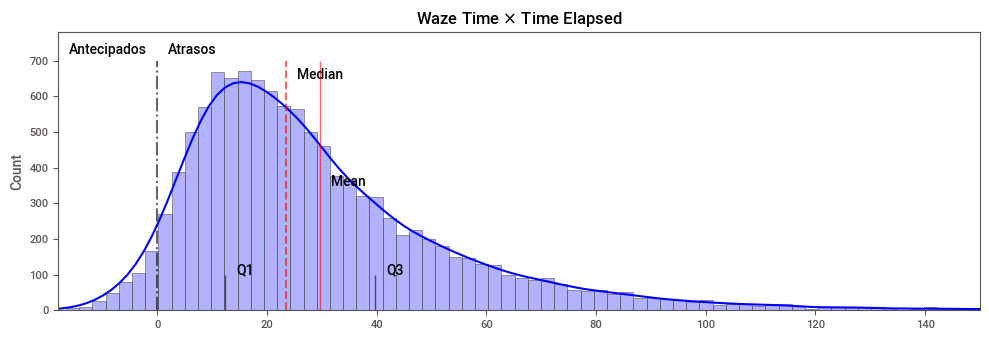

count    11652.000000
mean        29.708864
std         26.107033
min        -26.251900
25%         12.458087
50%         23.476900
75%         39.800317
max        269.686650
dtype: float64

Mean is highly influenced by outliers
Approx 50% have delays over Waze time of up to 20min


In [200]:
import seaborn as sns 
import numpy as np
fig, ax = plt.subplots(1,1,figsize=(10,3.5))

diferenca = dataset['time_elapsed'] -  dataset['waze_avg_time']
sns.histplot(diferenca, ax=ax,color='blue',alpha=0.3,kde=True)
ax.set_title('Waze Time $\\times$ Time Elapsed')
ax.set_xlim([-18,150])
ax.set_ylim([0,780])

ax.vlines(diferenca.median(),0,700,color='r',linestyle='--',alpha=0.6)
ax.text(diferenca.median()+2, 650,'Median')
ax.vlines(0,0,700,color='k',linestyle='-.',alpha=0.6)
ax.text(0+2, 720,'Atrasos')
ax.text(0-16, 720,'Antecipados')
ax.vlines(diferenca.mean(),0,700,color='r',linestyle='-',alpha=0.6,lw=1)
ax.text(diferenca.mean()+2, 350,'Mean')

ax.vlines(diferenca.quantile(.25),0,100,color='k',linestyle='-',alpha=0.6,lw=1)
ax.text(diferenca.quantile(.25)+2, 100,'Q1')
ax.vlines(diferenca.quantile(.75),0,100,color='k',linestyle='-',alpha=0.6,lw=1)
ax.text(diferenca.quantile(.75)+2, 100,'Q3')


plt.tight_layout()
plt.show()

print(diferenca.describe())
print()
print('Mean is highly influenced by outliers')
print('Approx 50% have delays over Waze time of up to 20min')
